In [372]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [373]:
df = pd.read_csv("Muskets_teamData_V2.csv")
df.head(1)

C:\Users\BONAT\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (26,29,76) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771


In [374]:
dfcopy = df.copy()
dfcopy.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

Sub Tasks
1. Extract the player names from the PlayerUrl column and create a new column name Player
Name from the extracts 

In [375]:
dfcopy['PlayerName'] = dfcopy['playerUrl'].apply(lambda url: url.split('/')[5]).replace('-', ' ')
dfcopy['PlayerName'] = dfcopy['PlayerName'].str.replace('-', ' ')


selected_columns = ['playerUrl', 'PlayerName']

dfcopy.loc[:, selected_columns].head()

,playerUrl,PlayerName
0,http://sofifa.com/player/158023/lionel-messi/2...,lionel messi
1,http://sofifa.com/player/20801/c-ronaldo-dos-s...,c ronaldo dos santos aveiro
2,http://sofifa.com/player/200389/jan-oblak/210006/,jan oblak
3,http://sofifa.com/player/192985/kevin-de-bruyn...,kevin de bruyne
4,http://sofifa.com/player/190871/neymar-da-silv...,neymar da silva santos jr


2. Create a new column titled Player Status from the CONTRACT column with 3 labels ;
a. 'Active' If the player has an active contract
b. 'Free', if the player is free
c. 'On Loan' if the player is on loan

In [376]:
print(dfcopy.Contract.unique())
print('missing values:', dfcopy['Contract'].isna().sum())

['2004 ~ 2021' '2018 ~ 2022' '2014 ~ 2023' '2015 ~ 2023' '2017 ~ 2022'
 '2017 ~ 2023' '2018 ~ 2024' '2014 ~ 2022' '2018 ~ 2023' '2016 ~ 2023'
 '2013 ~ 2023' '2011 ~ 2023' '2009 ~ 2022' '2005 ~ 2021' '2011 ~ 2021'
 '2015 ~ 2022' '2017 ~ 2024' '2010 ~ 2024' '2012 ~ 2021' '2019 ~ 2024'
 '2015 ~ 2024' '2017 ~ 2025' '2020 ~ 2025' '2019 ~ 2023' '2008 ~ 2023'
 '2015 ~ 2021' '2020 ~ 2022' '2012 ~ 2022' '2016 ~ 2025' '2013 ~ 2022'
 '2011 ~ 2022' '2012 ~ 2024' '2016 ~ 2021' '2012 ~ 2023' '2008 ~ 2022'
 '2019 ~ 2022' '2017 ~ 2021' '2013 ~ 2024' '2020 ~ 2024' '2010 ~ 2022'
 '2020 ~ 2021' '2011 ~ 2024' '2020 ~ 2023' '2014 ~ 2024' '2013 ~ 2026'
 '2016 ~ 2022' '2010 ~ 2021' '2013 ~ 2021' '2019 ~ 2025' '2018 ~ 2025'
 '2016 ~ 2024' '2018 ~ 2021' '2009 ~ 2024' '2007 ~ 2022'
 'Jun 30, 2021 On Loan' '2009 ~ 2021' '2019 ~ 2021' '2019 ~ 2026' 'Free'
 '2012 ~ 2028' '2010 ~ 2023' '2014 ~ 2021' '2015 ~ 2025' '2014 ~ 2026'
 '2012 ~ 2025' '2017 ~ 2020' '2002 ~ 2022' '2020 ~ 2027' '2013 ~ 2025'
 'Dec 31, 2020 On 

In [377]:
def Player_Status(Contract):
    if 'Free' in Contract:
        return 'Free'
    elif 'On Loan' in Contract:
        return 'On Loan'
    else:
        return 'Active'
    
    
dfcopy['PlayerStatus'] = df['Contract'].apply(Player_Status)

In [378]:
selected_columns = ['Contract', 'PlayerStatus']


dfcopy.loc[:, selected_columns].sample(10)


,Contract,PlayerStatus
17545,2019 ~ 2024,Active
1354,2017 ~ 2025,Active
18818,2018 ~ 2021,Active
15901,2020 ~ 2022,Active
11493,2020 ~ 2021,Active
12342,2019 ~ 2020,Active
12430,2020 ~ 2021,Active
12071,2017 ~ 2021,Active
18687,2018 ~ 2021,Active
2868,2020 ~ 2023,Active


3. Unpack the POSITIONS column into as many columns as there are positions and assign Boolean
values in the columns for each player as appropriate. Name the columns the play position

In [379]:
dfcopy.Positions.head(4)

0    RW, ST, CF
1        ST, LW
2            GK
3       CAM, CM
Name: Positions, dtype: object

In [380]:
dfcopy.Positions.unique()

array(['RW, ST, CF', 'ST, LW', 'GK', 'CAM, CM', 'LW, CAM', 'ST', 'RW',
       'ST, LW, RW', 'CB', 'LW', 'CDM', 'CF, ST', 'LW, RW', 'CDM, CM',
       'CDM, RB', 'CF, CAM', 'LW, ST', 'CM', 'ST, CF, LW', 'RM, LM, CAM',
       'RB', 'RW, CAM, CM', 'LB', 'LM, CF', 'CF', 'RW, LW', 'CAM, RM, RW',
       'CM, CDM', 'CAM, CF, ST', 'CM, CDM, CAM', 'CF, LW, CAM',
       'CAM, RM, CF', 'LM, ST', 'RM, LM, RW', 'LM', 'CAM, RW', 'CB, CDM',
       'RW, RM', 'LW, CF', 'CM, RM, LM', 'LB, LM', 'CAM, CM, RM',
       'CAM, CM, CF', 'CAM, CF', 'LM, RM, LW', 'LM, LB, CM', 'CM, LM, LB',
       'RM, RW', 'RM, CM', 'CAM, CM, LW', 'CB, LB', 'RM, RB', 'ST, RW',
       'LM, RW, LW', 'RB, LB', 'RB, RM', 'RM', 'LM, RM, CF', 'CAM, RM',
       'RB, RWB', 'CDM, CB, CM', 'CAM, RM, ST', 'LM, LW, RM', 'CM, CAM',
       'ST, RM, CF', 'LM, RM', 'RM, CF', 'LM, LWB', 'RW, RM, CF',
       'RB, CM', 'LW, CAM, RW', 'CAM, LW, CM', 'CM, CAM, CDM',
       'RW, LW, CAM', 'CM, CAM, LM', 'CM, RM, ST', 'CDM, CM, RB',
       'ST, CAM', 

In [381]:
dfcopy['Positions'] = dfcopy['Positions'].str.replace(' ', '')


positions = dfcopy['Positions'].str.get_dummies(sep=',')

# Combine the new position columns with the original DataFrame
dfcopy = pd.concat([dfcopy, positions], axis=1)

In [382]:
# View the last 16 columns
dfcopy.iloc[:, -17:]


,PlayerName,PlayerStatus,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,lionel messi,Active,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,c ronaldo dos santos aveiro,Active,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,jan oblak,Active,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,kevin de bruyne,Active,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,neymar da silva santos jr,Active,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,ao xia,Active,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
19017,ben hough,Active,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
19018,ronan mckinley,Active,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
19019,zhenao wang,Active,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


4. Weight and Height, W/F, SM and IR Columns: convert to integers. 
We can't convert Weight and Height, W/F, SM and IR Columns to integers on the same columns, without doing some cleaning

In [383]:
continuous_vars=dfcopy.select_dtypes('float64').columns
print('continuous:', continuous_vars)
print('-----------------------------------------------------------------------------------')
categorical_vars=dfcopy.select_dtypes('object').columns
print('categorical:', categorical_vars)
print('-----------------------------------------------------------------------------------')
int_vars=dfcopy.select_dtypes('int64').columns
print('int:', int_vars)
print('-----------------------------------------------------------------------------------')

continuous: Index(['↓OVA', 'POT', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Volleys', 'Skill', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility',
       'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina',
       'Strength', 'Long Shots', 'Mentality', 'Interceptions', 'Positioning',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'Total Stats', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY'],
      dtype='object')
-----------------------------------------------------------------------------------
categorical: Index(['Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Club',
       'Contract', 'Positions', 'Height', 'Weight', 'Preferred Foot',
       'Best Position', 'Joined', 'Loan Date End', 'Value', 'Wage',
       'Release Clause', 'Sho

-- Lets solve for missing values

In [384]:
for col in dfcopy:
    if dfcopy[col].isna().sum() > 0:
        print(col)
        print('Total number of missing values:', dfcopy[col].isna().sum())
        print('-----------------------------------------')

↓OVA
Total number of missing values: 2
-----------------------------------------
POT
Total number of missing values: 1
-----------------------------------------
Weight
Total number of missing values: 1
-----------------------------------------
Loan Date End
Total number of missing values: 18006
-----------------------------------------
Release Clause
Total number of missing values: 3
-----------------------------------------
Attacking
Total number of missing values: 1
-----------------------------------------
Crossing
Total number of missing values: 1
-----------------------------------------
Finishing
Total number of missing values: 5
-----------------------------------------
Heading Accuracy
Total number of missing values: 8
-----------------------------------------
Short Passing
Total number of missing values: 9
-----------------------------------------
Volleys
Total number of missing values: 7
-----------------------------------------
Skill
Total number of missing values: 6
-------

[93. 92. 91. 90. 89. 88. 87. 86. 85. 84. 83. 82. nan 81. 80. 79. 78. 77.
 76. 75. 74. 73. 72. 71. 70. 69. 68. 67. 66. 65. 64. 63. 62. 61. 60. 59.
 58. 57. 56. 55. 54. 53. 52. 51. 50. 49. 48. 47.]


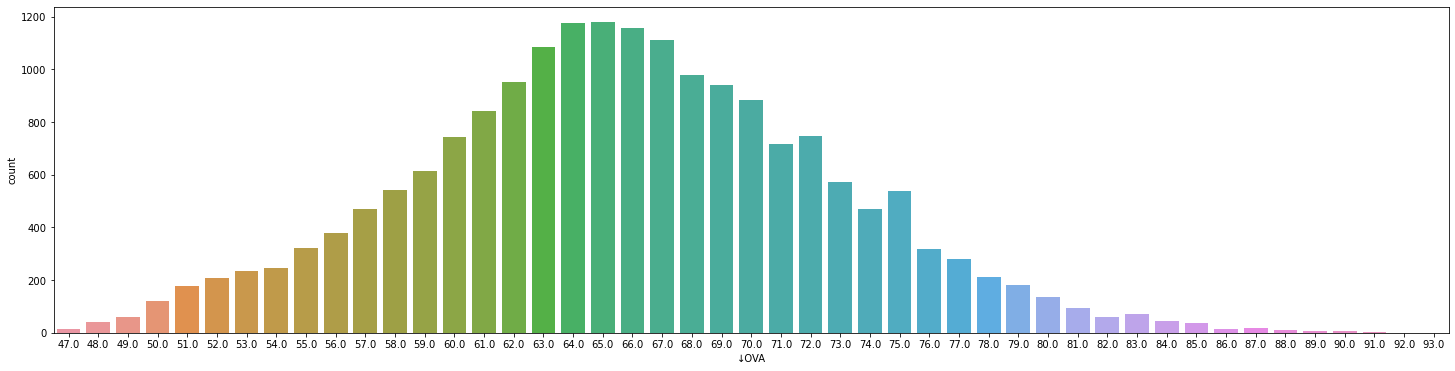

In [385]:
print(dfcopy['↓OVA'].unique())

plt.figure(figsize=(25, 6))  # Set the desired figure size

sns.countplot(x=dfcopy['↓OVA'])

plt.show()

In [386]:
#using this technique because the data is sequencial

# Backward fill missing values
dfcopy['↓OVA'] = dfcopy['↓OVA'].fillna(method='bfill')

dfcopy['↓OVA'].isna().sum()

0

[93. 92. 91. 90. 95. 89. 88. 87. 86. 85. 84. 83. 82. nan 81. 80. 79. 78.
 77. 76. 75. 74. 73. 72. 71. 70. 69. 68. 67. 66. 65. 64. 63. 62. 61. 60.
 59. 58. 57. 56. 55. 54. 53. 52. 51. 50. 49. 48. 47.]


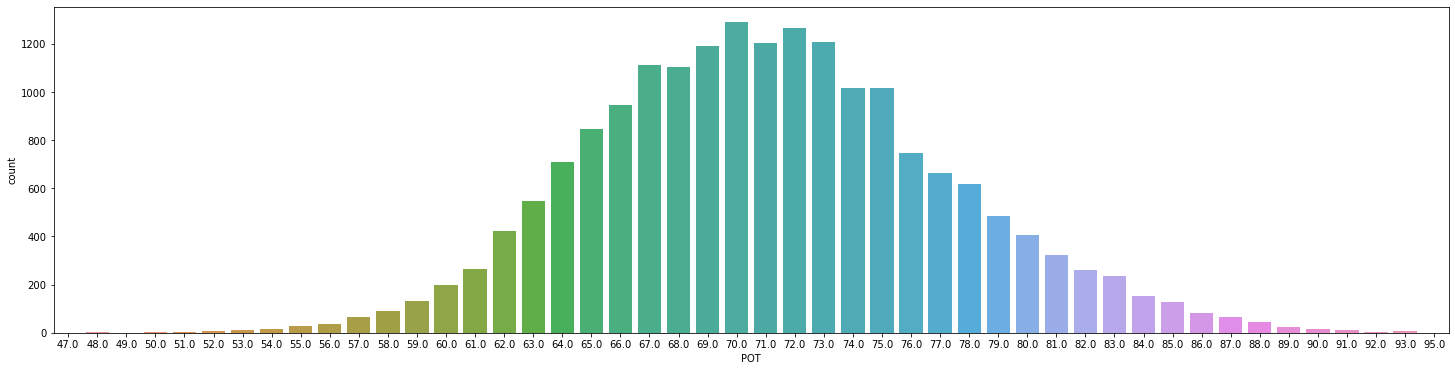

In [387]:
print(dfcopy['POT'].unique())
plt.figure(figsize=(25, 6))  # Set the desired figure size

sns.countplot(x=dfcopy['POT'])

plt.show()

In [388]:
#using this technique because the data is sequencial

# Forward fill missing values
dfcopy['POT'] = dfcopy['POT'].fillna(method='ffill')

dfcopy['POT'].isna().sum()

0

Dealing with the Weight column

In [389]:
dfcopy['Weight'].unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       nan, '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs',
       '185lbs', '170lbs', '203lbs', '168lbs', '161lbs', '146lbs',
       '130lbs', '190lbs', '174lbs', '148lbs', '165lbs', '159lbs',
       '192lbs', '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg',
       '103kg', '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg',
       '107kg', '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [390]:
# Function to convert pounds (lbs) to kilograms (kg)
def convert_to_kg(Weight):
    if pd.notnull(Weight):
        if 'lbs' in str(Weight):
            Weight_lb = int(Weight.replace('lbs', ''))
            return int(round(Weight_lb * 0.453592))
        elif 'kg' in str(Weight):
            weight_kg = int(Weight.replace('kg', ''))
            return int(weight_kg)
        else:
            return int(Weight)
    else:
        return Weight


dfcopy['Weight'] = dfcopy['Weight'].apply(convert_to_kg)


print(dfcopy.Weight.unique())

[ 72.  83.  87.  70.  68.  80.  71.  91.  73.  85.  92.  69.  84.  96.
  81.  82.  75.  86.  89.  74.  76.  64.  78.  90.  66.  60.  94.  79.
  67.  65.  59.  61.  93.  88.  97.  77.  62.  63.  95. 100.  nan  58.
  98. 103.  99. 102.  56. 101.  57.  55. 104. 107. 110.  53.  50.  54.
  52.]


In [391]:
# Dropping rows with missing values in the 'Weight' column, the 'Weight' column are significant and removing them does not result in a substantial loss of data
dfcopy.dropna(subset=['Weight'], inplace=True)
dfcopy['Weight'].isna().sum()

0

[nan '30-Jun-21' '31-Dec-20' '30-Jan-21' '30-Jun-22' '31-May-21'
 '5-Jul-21' '31-Dec-21' '1-Jul-21' '1-Jan-21' '31-Aug-21' '31-Jan-21'
 '30-Dec-21' '23-Jun-21' '3-Jan-21' '27-Nov-21' '17-Jan-21' '30-Jun-23'
 '31-Jul-21' '22-Nov-20' '31-May-22' '30-Dec-20' '4-Jan-21' '30-Nov-20'
 '1-Aug-21']


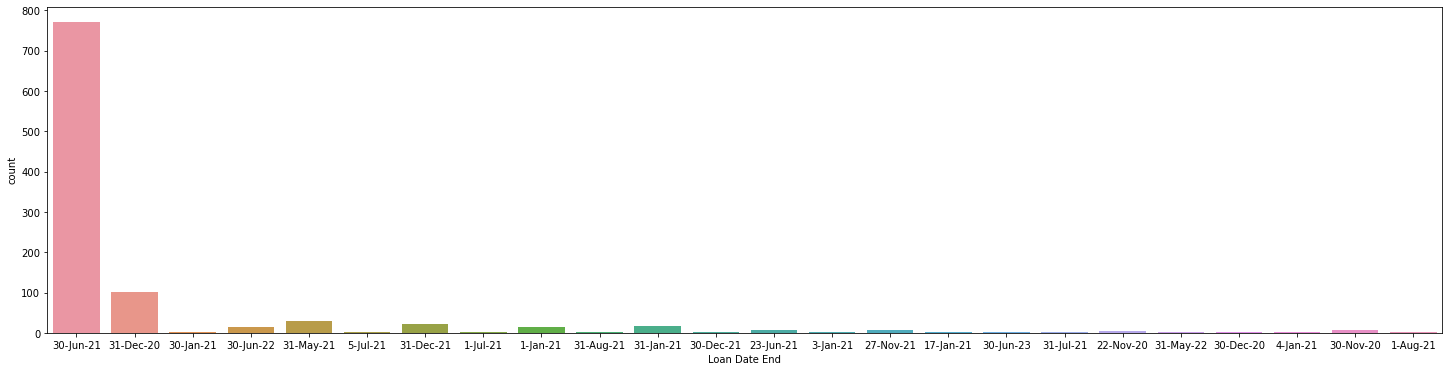

In [392]:
print(dfcopy['Loan Date End'].unique())

plt.figure(figsize=(25, 6)) 

sns.countplot(x=dfcopy['Loan Date End'])

plt.show()

In [393]:
# Fill missing values with 30-Jun-21, because 30-Jun-21 has higher percentage of the dataset
dfcopy['Loan Date End'] = dfcopy['Loan Date End'].fillna('30-Jun-21')

dfcopy['Loan Date End'].isna().sum()

0

In [394]:
#list(dfcopy['Release Clause'].unique())

In [395]:
dfcopy['Release Clause'] = dfcopy['Release Clause'].str.replace('€', '')  
dfcopy['Release Clause'] = dfcopy['Release Clause'].str.replace('M', 'e6') 
dfcopy['Release Clause'] = dfcopy['Release Clause'].str.replace('K', 'e3')
dfcopy['Release Clause'] = pd.to_numeric(dfcopy['Release Clause'], errors='coerce')  


print(dfcopy['Release Clause'])

0        138400000.0
1         75900000.0
2        159400000.0
3        161000000.0
4        166500000.0
            ...     
19016        70000.0
19017       165000.0
19018       131000.0
19019        88000.0
19020        79000.0
Name: Release Clause, Length: 19020, dtype: float64


In [396]:
# Drop rows with missing values in the 'Release Clause' column, the 'Release Clause' column are significant and removing them does not result in a substantial loss of data
dfcopy.dropna(subset=['Release Clause'], inplace=True)
dfcopy['Release Clause'].isna().sum()

0

[429. 437.  95. 407. 408. 423. 392. 114. 118. 316. 410. 349.  86. 119.
 426. 374. 411. 360. 328. 383. 405. 123. 420. 224. 388. 397. 425. 373.
 365. 371. 311. 396. 345. 399. 400.  78. 280. 330. 403. 379. 380.  94.
 394. 419. 339. 293. 344. 390.  84. 359. 372. 377. 346. 389. 386. 308.
 277. 382. 368. 402. 292. 298. 366. 352. 363. 322. 361.  91. 364. 341.
 385. 355. 305. 321. 262.  93. 375. 387. 356. 253. 285. 391. 353. 367.
  90. 295. 378. 256. 338. 331.  69. 105.  85. 358. 343. 319. 271. 113.
 350. 406. 340. 393. 247. 334. 351. 342. 302. 329. 354.  98. 301. 115.
 384. 208.  72. 376.  92. 258. 362.  74. 417.  99. 263.  88. 279. 101.
 395. 100.  81.  87.  55. 310.  82. 117. 409. 318. 323. 248. 315. 381.
 348. 327. 309. 130. 283. 336. 369. 106. 252. 320. 290. 370. 126. 251.
 108. 335. 297. 284.  80.  75. 357. 270.  97. 306. 337.  73. 286. 325.
 326. 324. 333. 103. 259. 273. 313. 296.  61. 312. 347. 401. 304. 278.
  83.  43. 314. 291. 264. 272. 317. 231. 250. 268.  54. 261. 255.  70.
 281. 

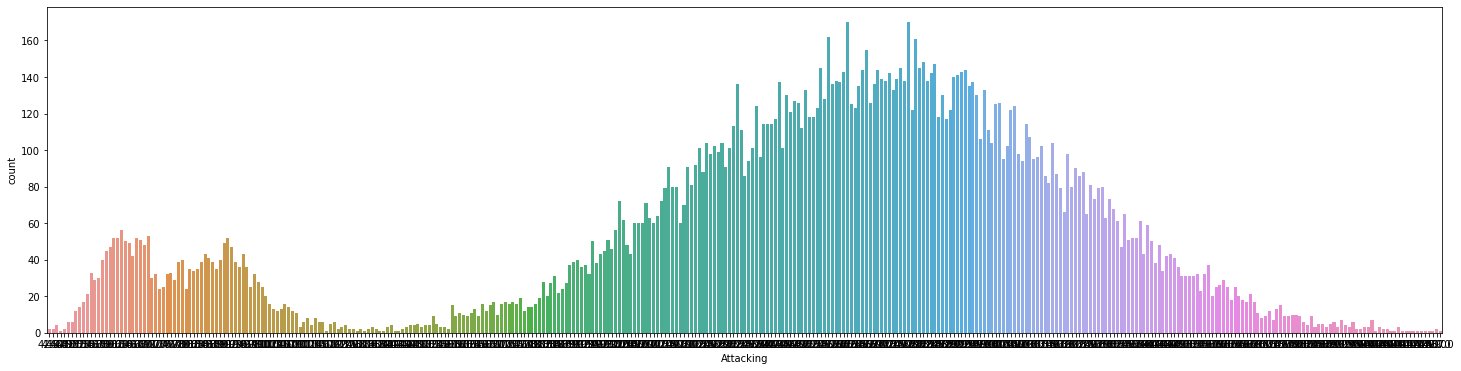

0

In [397]:
print(dfcopy['Attacking'].unique())

plt.figure(figsize=(25, 6))

sns.countplot(x=dfcopy['Attacking'])

plt.show()

# Fill missing values in the 'Attacking' column with the mean , because Attacking has random values
dfcopy['Attacking'] = dfcopy['Attacking'].fillna(dfcopy['Attacking'].mean())
dfcopy['Attacking'].isna().sum()

[85. 84. 13. 94. 71. 79. 17. 78. 18. 53. 76. 58. 14. 15. 75. 66. 70. 68.
 91. 82. 20. 12. 30. 77. 88. 83. 93. 90. 87. 81. 73. 11. 54. 62. 86. 80.
 55. 42. 57. 65. 63. 64. 52. 40. 69. 47. 60.  9. 16. 44. 72. 50. 56. 46.
 89. 34. 45. 74. 49. 67. 24. 35. 36. 61. 19. 27. 25. 10. 51. 38. 43. 59.
 39. 48. 23.  8. 28. nan 92. 41. 29. 32. 22. 26. 37. 33. 31. 21.  7.  6.]


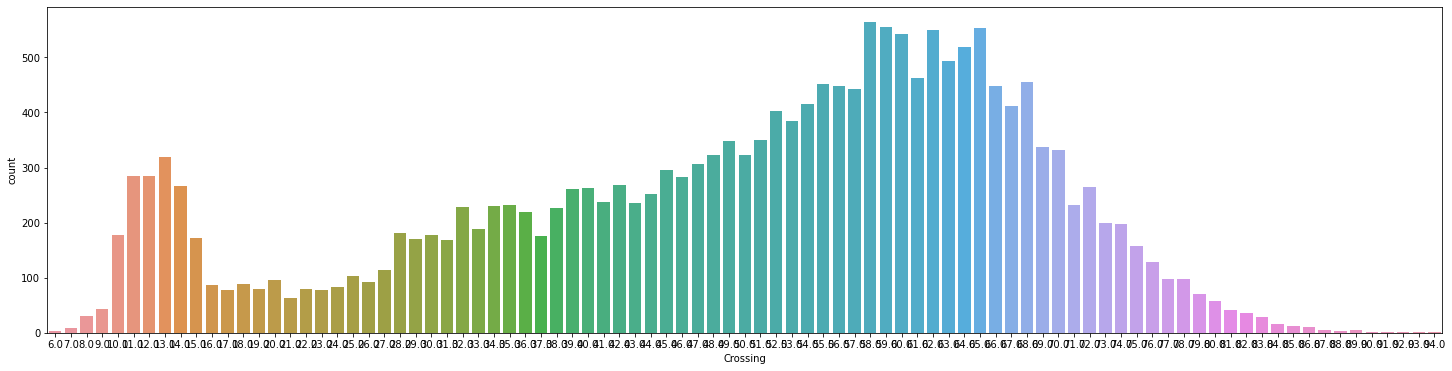

In [398]:
print(dfcopy['Crossing'].unique())

plt.figure(figsize=(25, 6)) 

sns.countplot(x=dfcopy['Crossing'])

plt.show()

In [399]:
# Fill missing values in the 'Crossing' column with the mean , because Crossing has random values
dfcopy['Crossing'] = dfcopy['Crossing'].fillna(dfcopy['Crossing'].mean())
dfcopy['Crossing'].isna().sum()

0

[95. 11. 82. 87. 94. 91. 13. 14. 52. 90. 64. 88. 65. 85. 66. 84. 10. 22.
 76. 81. 56. 79. 57. 45. 77. 63. 86. 80. 15. 33. 67. 12. 72. 92. 93. 51.
 46. 60. 75. 55. 73. 83. 50. 42. 39. 40.  9. 68. 48. 37. 70. 78. 69.  8.
 53. 89. 25. 62. 71. 74. 44. 26. 19. 32. 18. 61. 58. 30. 54. 36. 29. 16.
 38. 59. 27. 34. 47. 20. 31. 49. 43. 41. 28. nan  5.  7.  6. 21. 17. 35.
 23. 24.  4.  3.]


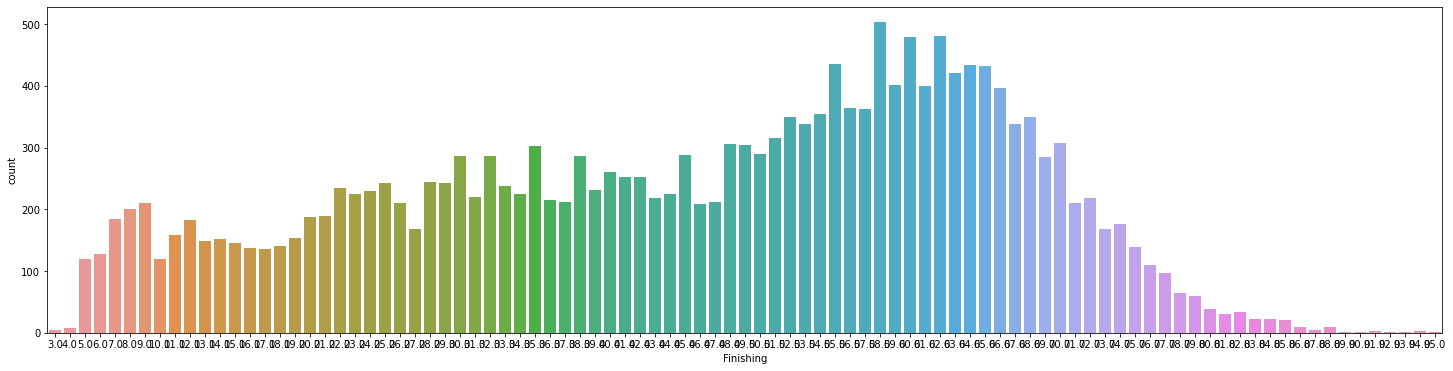

In [400]:
print(dfcopy['Finishing'].unique())

plt.figure(figsize=(25, 6)) 

sns.countplot(x=dfcopy['Finishing'])

plt.show()

In [401]:
# Fill missing values in the 'Finishing' column with the mean , because Finishing has random values
mean_Finishing = dfcopy['Finishing'].mean()
dfcopy['Finishing'] = dfcopy['Finishing'].fillna(round(mean_Finishing, 0))
dfcopy['Finishing'].isna().sum()

0

[70. 90. 15. 55. 62. 85. 59. 19. 73. 11. 87. 84. 80. 13. 25. 91. 92. 78.
 46. 54. 72. 64. 14. 10. 61. 58. 83. 38. 69. 51. 67. 86. 75. 68. 16. 81.
 21. 79. 53. 65. 82. 12. 42. 48. 88. 66. 76. 74. 52. 23. 40. 49. 60. 44.
 20. 37. 71. 17. 45. 77. 50. 63. 43. 39. 57. 56. 47. 24. 18. 31. 28. 35.
 34. 41. 36. 93.  7. nan 30. 89.  8. 26. 33. 27. 32. 22. 29.  9.  5.  6.]


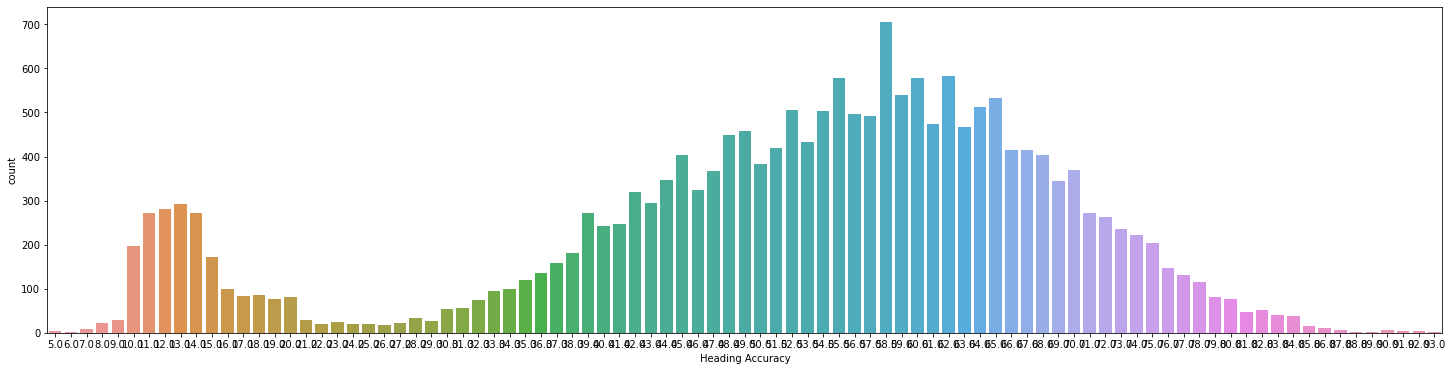

In [402]:
print(dfcopy['Heading Accuracy'].unique())

plt.figure(figsize=(25, 6)) 

sns.countplot(x=dfcopy['Heading Accuracy'])

plt.show()

In [403]:
# Fill missing values in the 'Heading Accuracy' column with the mean , because Heading Accuracy has random values
mean_Heading = dfcopy['Heading Accuracy'].mean()
dfcopy['Heading Accuracy'] = dfcopy['Heading Accuracy'].fillna(round(mean_Heading, 0))
dfcopy['Heading Accuracy'].isna().sum()

0

['91' '82' '43' '94' '87' '84' '45' '83' '61' '79' '85' '33' '55' '86'
 '57' '81' '42' '74' '93' '88' '30' '65' '89' '77' '32' '50' '80' '78'
 '90' '69' '40' '92' '75' '73' '34' '76' '35' '70' '37' '23' '44' '38'
 '48' '26' '60' '25' '46' '28' '24' '36' '51' '17' '18' '39' '71' '67'
 '27' '72' '66' '20' '31' '68' '29' '11' '64' '62' nan '41' '63' '19' '54'
 '16' '69_' '22' '49' '59' '14' '58' '15' '21' '52' '56' '53' '12' '47'
 '13' 58 65 70 67 66 57 72 37 26 60 64 55 56 59 68 21 74 42 63 62 47 22 52
 15 12 73 61 54 71 25 28 27 31 69 50 75 29 36 41 32 53 48 30 11 35 16 51
 18 43 19 34 33 23 38 20 13 39 49 24 46 17 8 14 45 44 40 76 7]


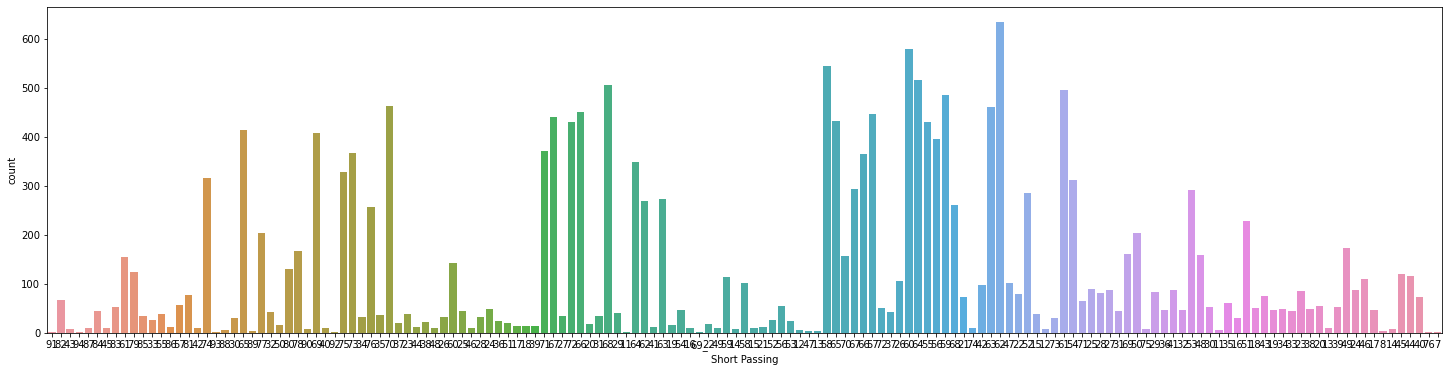

In [404]:
print(dfcopy['Short Passing'].unique())

plt.figure(figsize=(25, 6)) 

sns.countplot(x=dfcopy['Short Passing'])

plt.show()

In [405]:
# Fill missing values in the 'Short Passing' column with the mean , because Short Passing has random values
# by removing non-numeric characters
dfcopy['Short Passing'] = dfcopy['Short Passing'].str.replace('_', '')
dfcopy['Short Passing'] = dfcopy['Short Passing'].astype(float)

mean_short_passing = dfcopy['Short Passing'].mean()

dfcopy['Short Passing'] = dfcopy['Short Passing'].fillna(round(mean_short_passing, 0))
dfcopy['Short Passing'].isna().sum()

0

[88. 86. 13. 82. 87. 89. 79. 20. 83. 14. 45. 75. 63. 12. 11. 69. 67. 56.
 18. 85. 62. 70. 32. 40. 47. 81. 44. 84. 78. 76. 90. 49. 42. 64. 57. 60.
  8. 72. 71. 59. 74. 80. 73. 37. 31. 38. 61. 10. 77. 68. 58. 66. 30. 33.
 65. 27. 51. 15. 16. 50. 43. 35. 24. 17. 34. 28.  9. 39. 52. 46. 22. 19.
 53. 55. 48. 54. 23.  5. 41. 25. 21. 36. nan 26. 29.  6.  7.  4.  3.]


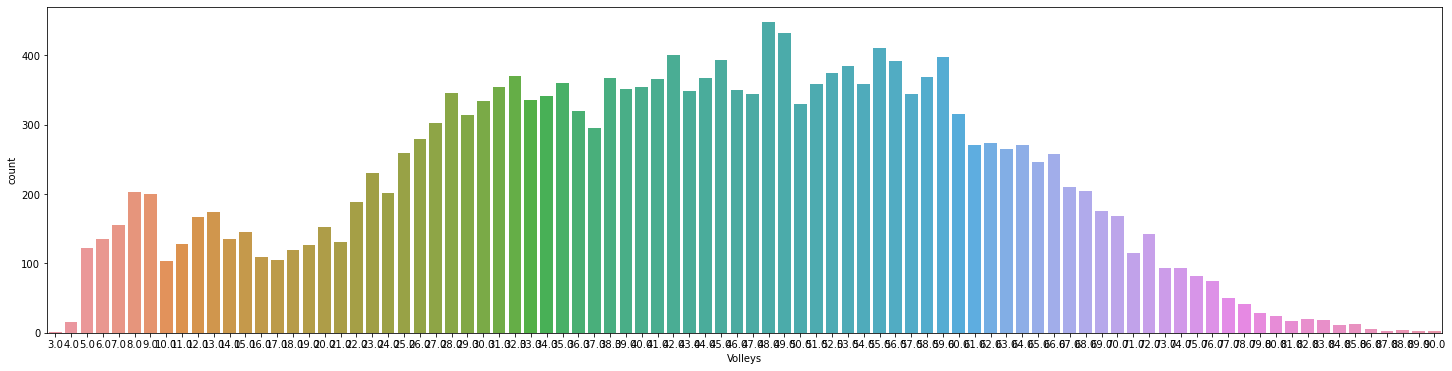

In [406]:
print(dfcopy['Volleys'].unique())

plt.figure(figsize=(25, 6))

sns.countplot(x=dfcopy['Volleys'])

plt.show()

In [407]:
# Fill missing values in the 'Volleys' column with the mean , because Volleys has random values
mean_Volleys = dfcopy['Volleys'].mean()
dfcopy['Volleys'] = dfcopy['Volleys'].fillna(round(mean_Volleys, 0))
dfcopy['Volleys'].isna().sum()

0

[470. 414. 109. 441. 448. 407. 406. 138. 394. 144. 363. 391. 369. 110.
 160. 404. 381. 397. 387. 336. 400. 436. 157. 395. 100. 262. 427. 432.
 429. 380. 426. 411. 358. 351. 433. 365. 403.  98. 276. 386. 383.  99.
 413. 115. 341. 375. 143. 359. 309. 435. 330. 325. 355.  96. 420. 412.
 388. 319. 269. 399. 106. 402. 425. 297. 312. 418. 372. 352. 439. 409.
 349. 116. 371. 428. 104. 345. 430. 295. 405. 440. 422. 252. 401. 417.
 396. 233. 377. 251. 382. 368.  84. 356. 342. 410. 271. 350.  83. 126.
 103. 370. 362. 343. 328. 344. 415. 378. 275. 416. 119. 127. 373. 384.
  77. 393. 348. 317. 408. 376. 300. 220.  89. 107. 334.  72. 390. 419.
 305. 289. 398. 281. 354. 102. 339. 385. 139. 292.  97. 421.  91. 105.
  73. 335. 101. 340. 337. 306. 113. 122. 123. 302. 364. 250. 347. 333.
 323. 389. 361. 322.  86. 367. 258. 392.  92.  90. 310. 331. 338. 121.
 260.  82. 245. 324. 346. 379. 299. 284. 320. 283. 108. 278. 286. 296.
 315. 274.  88. 114. 264. 288.  94. 326. 366. 117. 360. 424.  93. 318.
 124. 

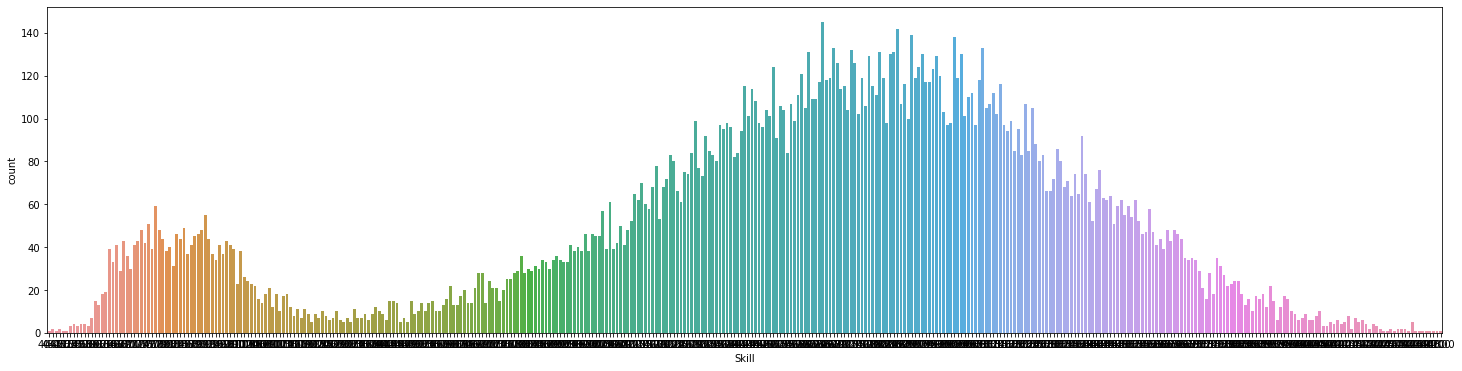

In [408]:
print(dfcopy['Skill'].unique())

plt.figure(figsize=(25, 6))  

sns.countplot(x=dfcopy['Skill'])

plt.show()

In [409]:
# Fill missing values in the 'Skill' column with the mean , because Skill has random values
mean_Skill = dfcopy['Skill'].mean()
dfcopy['Skill'] = dfcopy['Skill'].fillna(round(mean_Skill, 0))
dfcopy['Skill'].isna().sum()

0

['96' '88' '12' '95' '85' '90' '27' '92' '21' '70' '91' '69' '13' '30'
 '87' '65' '79' '83' '23' '80' '18' '93' '77' '63' '76' '16' '59' '81'
 '11' '84' '10' '75' '78' '55' '15' '86' '66' '67' '28' '57' '64' '82'
 '62' '19' '53' '72' '50' '26' '43' '89' '73' '20' '14' '68' '71' '74'
 '22' '54' '56' '61' '9' '24' '60' '25' '8' '17' '47' '58' '46' '42' '51'
 '52' '49' '44' '35' '48' '39' '29' '40' '70_' '45' nan '34' '31' '33'
 '38' '41' '32' '7' '37' '36' '5' '6' 64 46 65 61 57 60 71 19 41 18 63 70
 74 62 58 12 67 52 26 50 13 32 33 14 75 49 51 76 16 36 59 34 68 66 72 17
 54 44 73 42 56 55 37 69 40 30 47 24 11 15 45 35 39 38 6 7 53 43 48 10 20
 29 9 8 28 5 31 25 22 27 23 77 21]


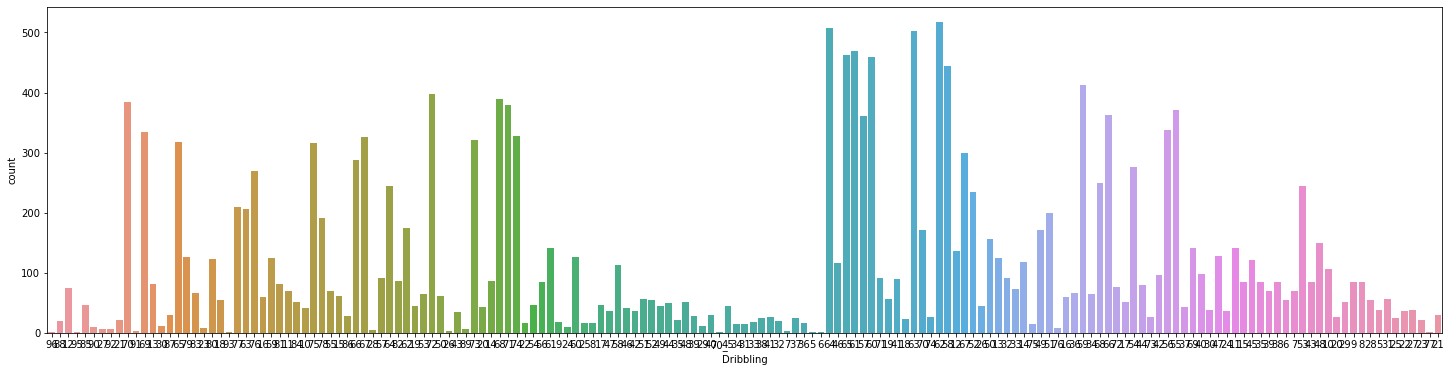

In [410]:
print(dfcopy['Dribbling'].unique())

plt.figure(figsize=(25, 6))  

sns.countplot(x=dfcopy['Dribbling'])

plt.show()

In [411]:
# Fill missing values in the 'Dribbling' column with the mean , because Dribbling has random values
# by removing non-numeric characters
dfcopy['Dribbling'] = dfcopy['Dribbling'].str.replace('_', '')
dfcopy['Dribbling'] = dfcopy['Dribbling'].astype(float)

mean_Dribbling = dfcopy['Dribbling'].mean()

dfcopy['Dribbling'] = dfcopy['Dribbling'].fillna(round(mean_Dribbling, 0))
dfcopy['Dribbling'].isna().sum()

0

[93. 81. 13. 85. 88. 79. 83. 19. 18. 60. 76. 63. 14. 74. 77. 49. 15. 80.
 12. 28. 86. 84. 82. 61. 71. 11. 66. 16. 89. 70. 21. 46. 78. 67. 58. 65.
 48. 34. 90. 59. 55. 87. 62.  9. 56. 36. 30. 32. 73. 69. 68. 75. 45. 10.
 72. 64. 41. 23. 47. 20. 51. 25. 44. 17. 54. 57. 53. 33. 40. 50. 39. 35.
 52. 42. 37. 43. 26. 31. 92. 91. nan 29. 94. 27. 38. 22. 24.  8.  6.  7.
  5.  4.]


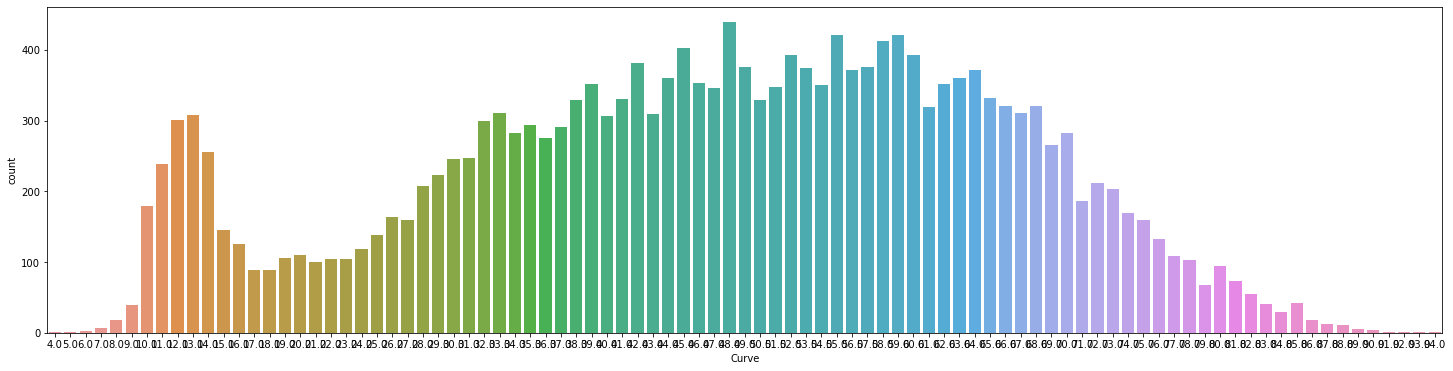

In [412]:
print(dfcopy['Curve'].unique())

plt.figure(figsize=(25, 6))

sns.countplot(x=dfcopy['Curve'])

plt.show()

In [413]:
# Fill missing values in the 'Curve' column with the mean , because Curve has random values
mean_Curve = dfcopy['Curve'].mean()
dfcopy['Curve'] = dfcopy['Curve'].fillna(round(mean_Curve, 0))
dfcopy['Curve'].isna().sum()

0

[94. 76. 14. 83. 89. 85. 69. 18. 63. 12. 70. 64. 74. 20. 11. 73. 49. 61.
 88. 68. 28. 79. 84. 48. 67. 38. 87. 53. 65. 15. 31. 78. 82. 10. 51. 59.
 19. 47. 52. 57. 43. 13. 77. 54. 75. 86. 55. 30. 62. 32. 58. 93.  8. 66.
 71. 81. 92. 44. 17. 60. 40. 16. 72. 46. 35. 45. 29. 21. 56. 80. 24. 22.
 39. 42. 26. 41.  9. 37. 27. 50. 33. 25. 36. 91. 34. 23. nan  7.  6. 90.
  5.]


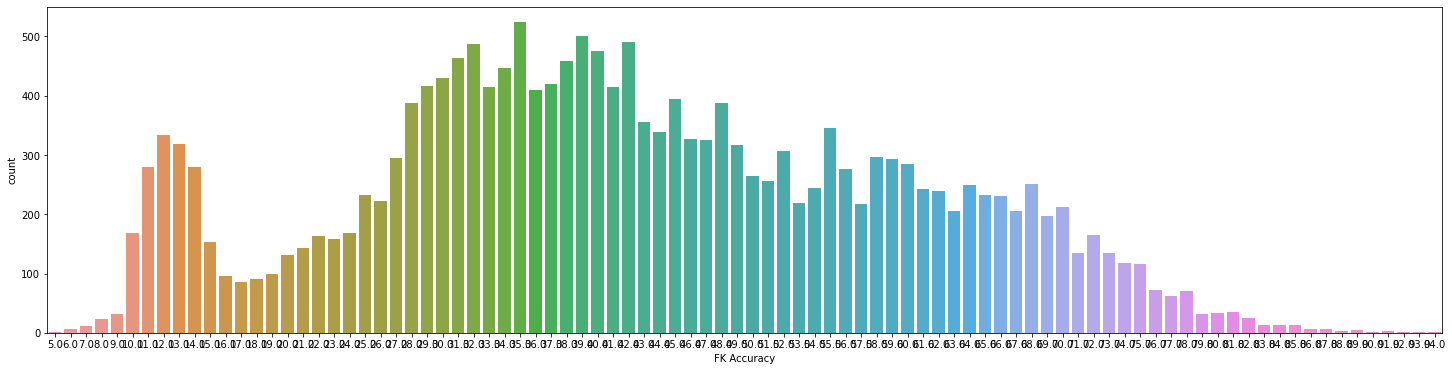

In [414]:
print(dfcopy['FK Accuracy'].unique())

plt.figure(figsize=(25, 6))

sns.countplot(x=dfcopy['FK Accuracy'])

plt.show()

In [415]:
# Fill missing values in the 'FK Accuracy' column with the mean , because FK Accuracy has random values
mean_FK = dfcopy['FK Accuracy'].mean()
dfcopy['FK Accuracy'] = dfcopy['FK Accuracy'].fillna(round(mean_FK, 0))
dfcopy['FK Accuracy'].isna().sum()

0

[91. 77. 40. 93. 81. 70. 75. 44. 63. 86. 71. 84. 35. 59. 73. 83. 64. 69.
 79. 82. 68. 89. 76. 80. 87. 37. 65. 36. 50. 53. 78. 47. 74. 48. 31. 85.
 24. 55. 90. 54. 62. 32. 49. 66. 67. 51. 28. 46. 52. 72. 56. 41. 45. 22.
 88. 61. 33. 12. 60. 17. 27. 29. 23. 38. 16. 58. 34. 25. 39. 21. 30. 42.
 43. 57. 20. 26. nan 18. 19. 13. 15. 11. 14.  9. 10.  5.  8.]


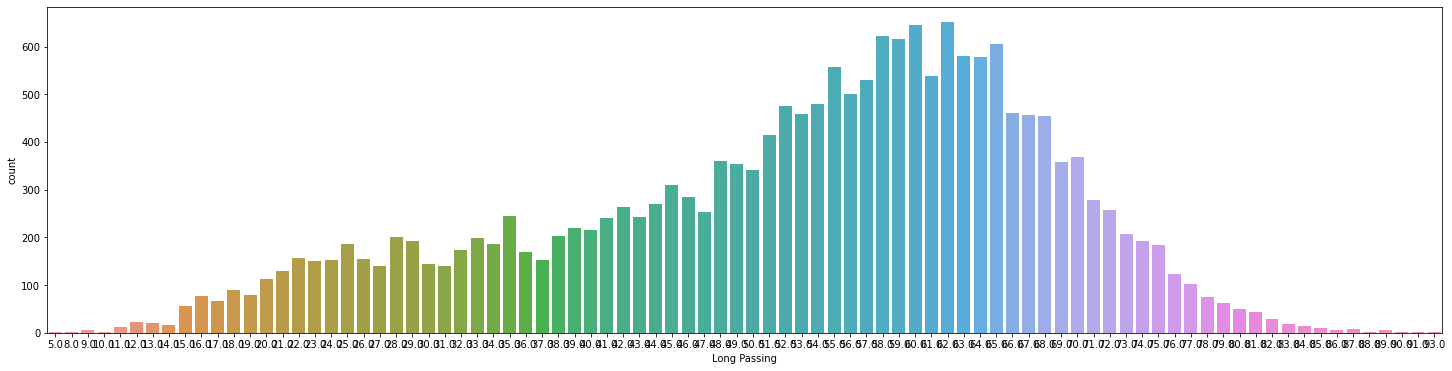

In [416]:
print(dfcopy['Long Passing'].unique())

plt.figure(figsize=(25, 6))

sns.countplot(x=dfcopy['Long Passing'])

plt.show()

In [417]:
# Fill missing values in the 'Long Passing' column with the mean , because Long Passing has random values
mean_Long = dfcopy['Long Passing'].mean()
dfcopy['Long Passing'] = dfcopy['Long Passing'].fillna(round(mean_Long, 0))
dfcopy['Long Passing'].isna().sum()

0

[96. 92. 30. 95. 88. 89. 90. 77. 79. 23. 46. 83. 80. 85. 94. 40. 84. 16.
 74. 91. 87. 82. 78. 19. 61. 22. 34. 38. 81. 25. 86. 76. 69. 28. 93. 75.
 35. 60. 63. 73. 18. 71. 15. 21. 72. 14. 65. 20. 24. 27. 70. 33. 17. 62.
 64.  9. 68. 67. 32. 26. 66. 52. 11. 57. 58. 29. 12. 37. 10. 36. 13. 31.
 55. 59. 39. nan 54. 56. 48. 44. 51. 50. 47. 49. 53.  5. 42.  8. 45. 43.
 41.  7.]


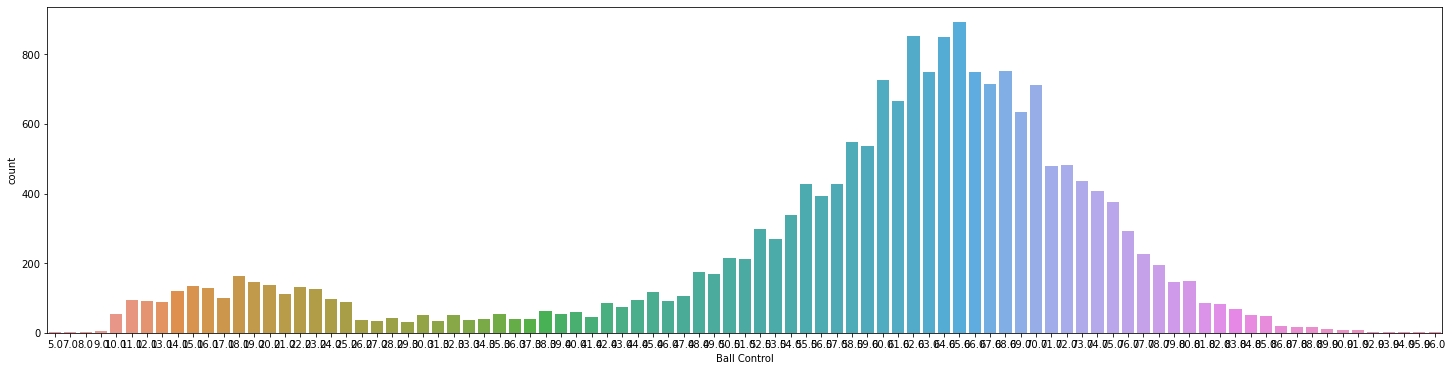

In [418]:
print(dfcopy['Ball Control'].unique())

plt.figure(figsize=(25, 6)) 

sns.countplot(x=dfcopy['Ball Control'])

plt.show()

In [419]:
# Fill missing values in the 'Ball Control' column with the mean , because Ball Control has random values
mean_Ball = dfcopy['Ball Control'].mean()
dfcopy['Ball Control'] = dfcopy['Ball Control'].fillna(round(mean_Ball, 0))
dfcopy['Ball Control'].isna().sum()

0

[451. 431. 307. 398. 453. 407. 460. 268. 458. 254. 354. 343. 284. 286.
 388. 378. 424. 464. 420. 399. 437. 322. 367. 272. 328. 448. 332. 425.
 435. 391. 434. 400. 331. 349. 429. 416. 312. 326. 418. 419. 417. 386.
 321. 409. 374. 304. 403. 351. 401. 365. 414. 292. 323. 299. 433. 350.
 348. 413. 320. 281. 427. 353. 364. 410. 428. 316. 381. 442. 375. 288.
 395. 385. 251. 319. 444. 383. 298. 411. 412. 415. 393. 397. 443. 423.
 387. 422. 327. 390. 362. 352. 406. 277. 361. 421. 396. 384. 450. 338.
 363. 359. 287. 297. 430. 382. 377. 380. 438. 449. 257. 371. 339. 341.
 404. 345. 394. 295. 246. 265. 258. 366. 294. 314. 266. 405. 218. 337.
 267. 220. 376. 309. 283. 426. 347. 244. 240. 291. 340. 250. 305. 290.
 317. 334. 355. 333. 389. 330. 318. 441. 402. 344. 335. 219. 264. 408.
 274. 373. 379. 256. 229. 392. 372. 360. 262. 346. 278. 248. 368. 279.
 269. 336. 342. 236. 370. 243. 315. 249. 227. 329. 239. 369. 223. 282.
 358. 271. 313. 270. 356. 263. 184. 311. 436. 432. 221. 301. 190. 259.
 308. 

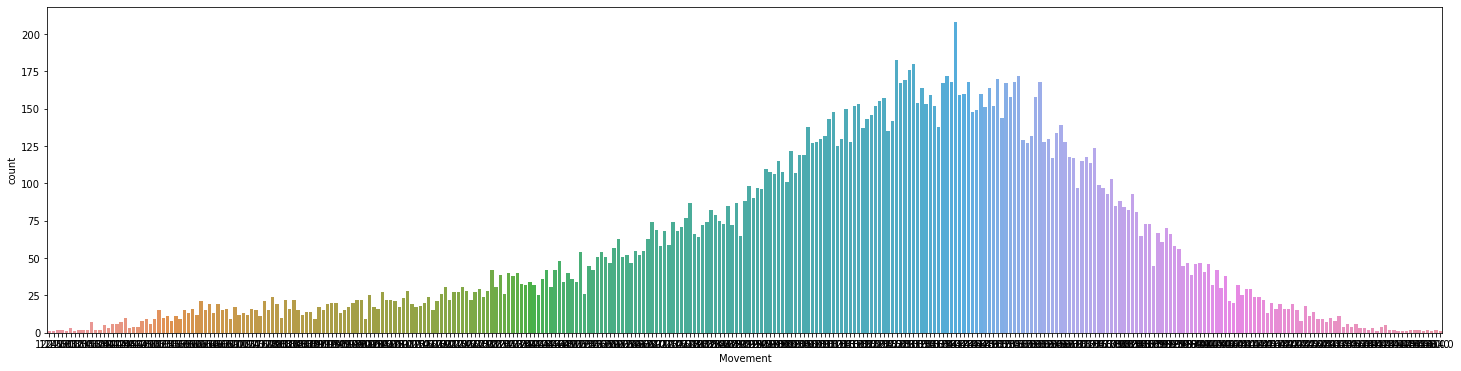

In [420]:
print(dfcopy['Movement'].unique())

plt.figure(figsize=(25, 6)) 

sns.countplot(x=dfcopy['Movement'])

plt.show()

In [421]:
# Fill missing values in the 'Movement' column with the mean , because Movement has random values
mean_Movement = dfcopy['Movement'].mean()
dfcopy['Movement'] = dfcopy['Movement'].fillna(round(mean_Movement, 0))
dfcopy['Movement'].isna().sum()

0

[91. 87. 43. 77. 94. 56. 96. 38. 72. 95. 60. 42. 54. 79. 89. 64. 66. 51.
 73. 57. 80. 86. 85. 78. 40. 82. 76. 65. 68. 90. 48. 46. 88. 70. 83. 84.
 93. 52. 74. 92. 55. 58. 59. 67. 81. 62. 44. 71. 69. 50. 53. 45. 49. 75.
 41. 61. 63. 35. 47. 34. 36. 37. 39. 30. 97. 31. 33. 32. 27. 28. nan 26.
 29. 25. 17. 19. 24. 15. 23. 21. 20. 22. 16. 18. 13. 14.]


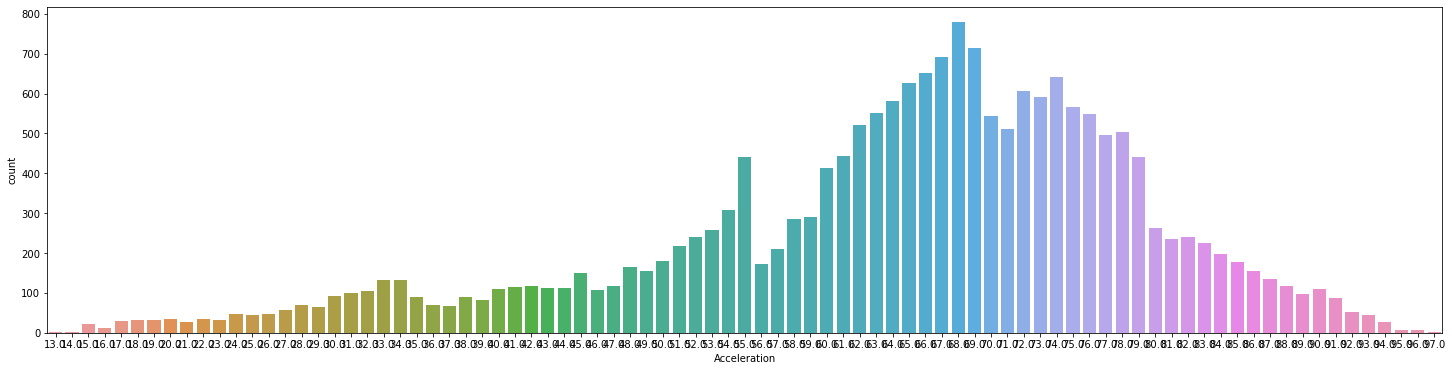

In [422]:
print(dfcopy['Acceleration'].unique())

plt.figure(figsize=(25, 6)) 

sns.countplot(x=dfcopy['Acceleration'])

plt.show()

In [423]:
# Fill missing values in the 'Acceleration' column with the mean , because Acceleration has random values
mean_Acceleration = dfcopy['Acceleration'].mean()
dfcopy['Acceleration'] = dfcopy['Acceleration'].fillna(round(mean_Acceleration, 0))
dfcopy['Acceleration'].isna().sum()

0

[80. 91. 60. 76. 89. 78. 92. 47. 96. 50. 79. 93. 69. 52. 72. 70. 90. 66.
 82. 63. 55. 77. 86. 81. 83. 85. 65. 68. 53. 43. 94. 62. 58. 61. 87. 64.
 67. 54. 88. 75. 95. 73. 49. 84. 56. 44. 74. 51. 57. 46. 59. 71. 37. 34.
 33. 42. 30. 35. 48. 39. 45. 40. 18. 38. 41. 27. 32. 29. nan 28. 36. 26.
 31. 22. 25. 23. 15. 20. 17. 16. 24. 19. 21. 12. 14.]


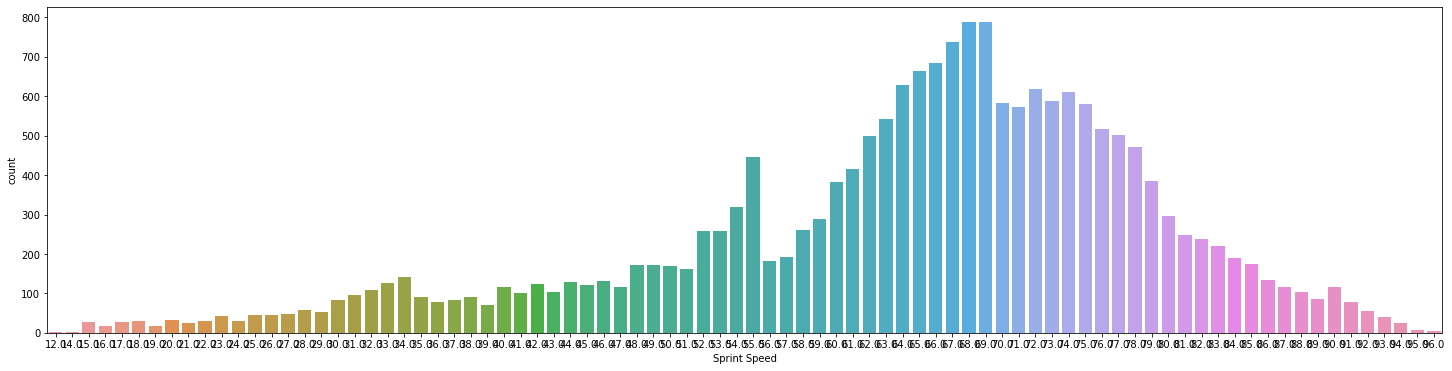

In [424]:
print(dfcopy['Sprint Speed'].unique())

plt.figure(figsize=(25, 6))

sns.countplot(x=dfcopy['Sprint Speed'])

plt.show()

In [425]:
# Fill missing values in the 'Sprint Speed' column with the mean , because Sprint Speed has random values
mean_Sprint = dfcopy['Sprint Speed'].mean()
dfcopy['Sprint Speed'] = dfcopy['Sprint Speed'].fillna(round(mean_Sprint, 0))
dfcopy['Sprint Speed'].isna().sum()

0

[91. 87. 67. 78. 96. 77. 40. 92. 37. 61. 93. 51. 79. 84. 94. 82. 60. 69.
 47. 52. 63. 74. 59. 66. 86. 85. 57. 55. 76. 75. 73. 62. 72. 90. 68. 64.
 80. 56. 48. 83. 41. 81. 54. 88. 33. 65. 49. 71. 89. 45. 70. 43. 50. 32.
 42. 39. 58. 36. 34. 53. 46. 95. 44. 38. 21. 29. 35. 31. 19. nan 26. 30.
 22. 28. 24. 25. 23. 27. 14. 18. 15. 20.]


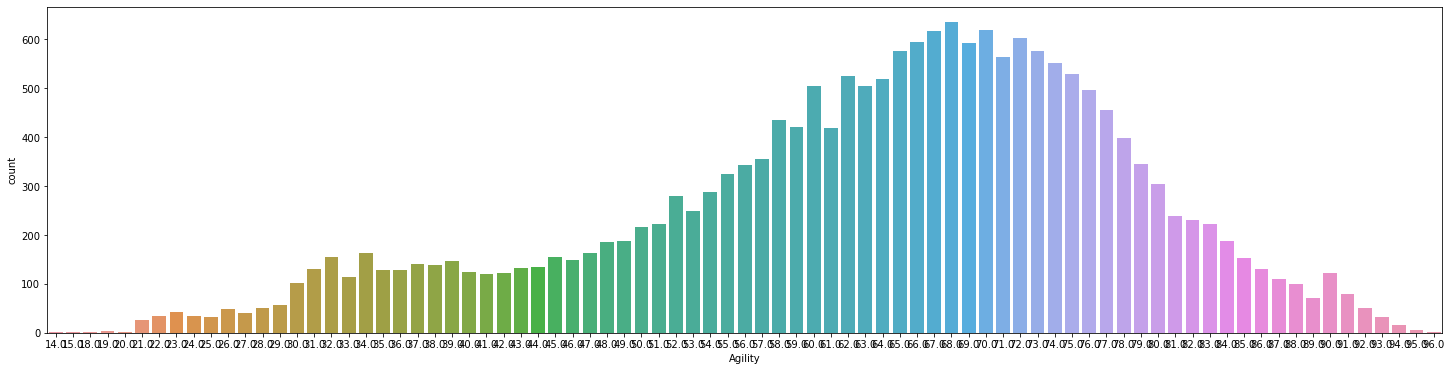

In [426]:
print(dfcopy['Agility'].unique())

plt.figure(figsize=(25, 6)) 

sns.countplot(x=dfcopy['Agility'])

plt.show()

In [427]:
# Fill missing values in the 'Agility' column with the mean , because Agility has random values
mean_Agility = dfcopy['Agility'].mean()
dfcopy['Agility'] = dfcopy['Agility'].fillna(round(mean_Agility, 0))
dfcopy['Agility'].isna().sum()

0

Dealing with missing values for more than one column

In [428]:
for col in dfcopy:
    if dfcopy[col].isna().sum() > 0:
        print(col)
        print(dfcopy[col].isna().sum())
        print(dfcopy[col].unique())
        print('----------------------------------------------------------------')

Reactions
4
[94. 95. 88. 91. 93. 92. 86. 89. 87. 84. 90. 83. 85. 82. 81. 79. 80. 74.
 75. 78. 77. 73. 76. 71. 70. 68. 72. 66. 69. 65. 67. 64. 59. nan 60. 62.
 63. 61. 58. 57. 56. 50. 54. 53. 55. 52. 32. 49. 48. 45. 51. 46. 47. 37.
 34. 44. 40. 38. 43. 41. 35. 42. 33. 39. 31. 36. 30. 24. 29. 28.]
----------------------------------------------------------------
Balance
7
[95. 71. 49. 76. 83. 82. 91. 37. 43. 53. 86. 66. 45. 35. 69. 94. 92. 84.
 90. 48. 73. 36. 41. 93. 74. 60. 79. 65. 78. 61. 57. 50. 68. 51. 54. 77.
 81. 39. 75. 58. 87. 85. 63. 38. 88. 67. 72. 62. 80. 44. 46. 42. 55. 40.
 70. 32. 89. 52. 59. 47. 64. 27. 56. 30. 31. 25. 34. 29. 24. 96. 33. 28.
 20. nan 23. 22. 26. 21. 17. 97. 19. 12. 18.]
----------------------------------------------------------------
Power
1
[389. 444. 268. 408. 357. 420. 393. 240. 404. 402. 406. 437. 249. 284.
 400. 403. 358. 381. 382. 273. 424. 264. 316. 361. 355. 328. 370. 350.
 365. 348. 411. 395. 385. 257. 337. 250. 379. 371. 409. 223. 398. 388.
 241

In [429]:
# Fill missing values for the remaining columns with the mean , because they have random values
# Define the list of columns
columns_to_fill = ['Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Long Shots', 'Mentality', 'Interceptions', 'Positioning',
                  'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Strength', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking',
                  'GK Positioning', 'Total Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']

for column in columns_to_fill:
    mean_value = dfcopy[column].mean()
    dfcopy[column] = dfcopy[column].fillna(round(mean_value, 0))

    # Check the count of remaining missing values
    missing_count = dfcopy[column].isna().sum()
    print(f"Missing values in {column}: {missing_count}")


Missing values in Reactions: 0
Missing values in Balance: 0
Missing values in Power: 0
Missing values in Shot Power: 0
Missing values in Jumping: 0
Missing values in Stamina: 0
Missing values in Long Shots: 0
Missing values in Mentality: 0
Missing values in Interceptions: 0
Missing values in Positioning: 0
Missing values in Penalties: 0
Missing values in Composure: 0
Missing values in Defending: 0
Missing values in Marking: 0
Missing values in Standing Tackle: 0
Missing values in Strength: 0
Missing values in Sliding Tackle: 0
Missing values in Goalkeeping: 0
Missing values in GK Diving: 0
Missing values in GK Handling: 0
Missing values in GK Kicking: 0
Missing values in GK Positioning: 0
Missing values in Total Stats: 0
Missing values in PAC: 0
Missing values in SHO: 0
Missing values in PAS: 0
Missing values in DRI: 0
Missing values in DEF: 0
Missing values in PHY: 0


['Low' 'Medium' 'High' nan]


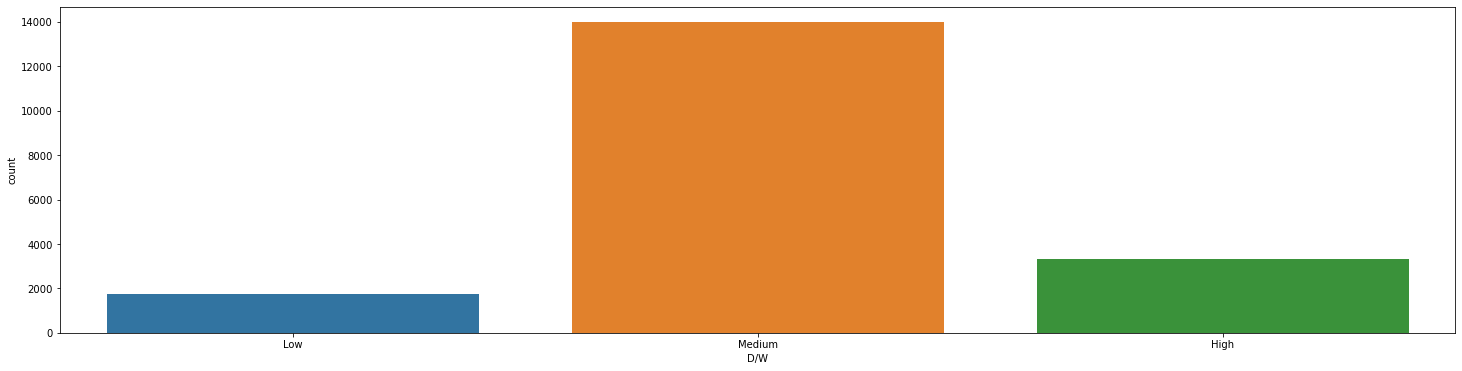

In [430]:
print(dfcopy['D/W'].unique())

plt.figure(figsize=(25, 6)) 

sns.countplot(x=dfcopy['D/W'])

plt.show()

In [431]:
#filling D/W missing values with Medium, because it has higher percentage of the data
dfcopy['D/W'] = dfcopy['D/W'].fillna('Medium')
dfcopy['D/W'].isna().sum()

0

4. Weight and Height, W/F, SM and IR Columns: convert to integers
5. Value, Wage and Release Clause columns: convert to Float 

In [432]:
columns_to_check = ['Weight', 'Height', 'W/F', 'SM', 'IR', 'Value', 'Wage', 'Release Clause']
dfcopy[columns_to_check].head()

,Weight,Height,W/F,SM,IR,Value,Wage,Release Clause
0,72.0,170cm,4 ★,4★,5 ★,€103.5M,€560K,138400000.0
1,83.0,187cm,4 ★,5★,5 ★,€63M,€220K,75900000.0
2,87.0,188cm,3 ★,1★,3 ★,€120M,€125K,159400000.0
3,70.0,181cm,5 ★,4★,4 ★,€129M,€370K,161000000.0
4,68.0,175cm,5 ★,5★,5 ★,€132M,€270K,166500000.0


In [433]:
dfcopy['Height'].unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

In [434]:
conversion_factor_feet_to_cm = 30.48  # 1 foot = 30.48 centimeters
conversion_factor_inches_to_cm = 2.54   # 1 inch = 2.54 centimeters

def convert_height_to_cm(height):
    if 'cm' in height:
        return int(height.replace('cm', ''))
    else:
        feet, inches = height.split("'")
        feet = int(feet)
        inches = int(inches[:-1])
        total_cm = feet * conversion_factor_feet_to_cm + inches * conversion_factor_inches_to_cm
        return total_cm

dfcopy['Height'] = dfcopy['Height'].apply(convert_height_to_cm)
dfcopy['Height'].unique()

array([170.  , 187.  , 188.  , 181.  , 175.  , 184.  , 191.  , 178.  ,
       193.  , 185.  , 199.  , 173.  , 168.  , 176.  , 177.  , 183.  ,
       180.  , 189.  , 179.  , 195.  , 172.  , 182.  , 186.  , 192.  ,
       165.  , 194.  , 167.  , 196.  , 163.  , 190.  , 174.  , 169.  ,
       171.  , 197.  , 200.  , 166.  , 187.96, 164.  , 198.  , 190.5 ,
       195.58, 180.34, 193.04, 185.42, 182.88, 177.8 , 175.26, 167.64,
       170.18, 162.56, 201.  , 158.  , 162.  , 161.  , 160.  , 203.  ,
       157.  , 156.  , 202.  , 159.  , 206.  , 155.  ])

In [435]:
# Remove '★' from the values in the 'W/F' column
dfcopy['W/F'] = dfcopy['W/F'].str.replace('★', '')

# Remove '★' from the values in the 'SM' column
dfcopy['SM'] = dfcopy['SM'].str.replace('★', '')

# Remove '★' from the values in the 'IR' column
dfcopy['IR'] = dfcopy['IR'].str.replace('★', '')

In [436]:
# Dealing with the 'Value and Wage' column
print(dfcopy['Value'].unique())
print(dfcopy['Wage'].unique())

['€103.5M' '€63M' '€120M' '€129M' '€132M' '€111M' '€120.5M' '€102M'
 '€185.5M' '€110M' '€113M' '€90.5M' '€82M' '€17.5M' '€83.5M' '€33.5M'
 '€114.5M' '€78M' '€103M' '€109M' '€92M' '€10M' '€76.5M' '€89.5M' '€87.5M'
 '€79.5M' '€124M' '€114M' '€95M' '€92.5M' '€105.5M' '€88.5M' '€85M'
 '€81.5M' '€26M' '€21M' '€56M' '€67.5M' '€53M' '€36.5M' '€51M' '€65.5M'
 '€46.5M' '€61.5M' '€72.5M' '€77.5M' '€43.5M' '€32.5M' '€36M' '€32M'
 '€54M' '€49.5M' '€57M' '€66.5M' '€74.5M' '€71.5M' '€121M' '€99M' '€67M'
 '€86.5M' '€93.5M' '€70M' '€62M' '€66M' '€58M' '€44M' '€81M' '€37M'
 '€14.5M' '€46M' '€47.5M' '€52.5M' '€54.5M' '€34.5M' '€57.5M' '€51.5M'
 '€44.5M' '€55M' '€48M' '€60.5M' '€63.5M' '€61M' '€29M' '€58.5M' '€55.5M'
 '€42M' '€40.5M' '€43M' '€45.5M' '€34M' '€26.5M' '€42.5M' '€35.5M' '€45M'
 '€41.5M' '€40M' '€11M' '€13.5M' '€29.5M' '€27M' '€15.5M' '€38.5M' '€52M'
 '€33M' '€19M' '€73.5M' '€38M' '€35M' '€47M' '€24M' '€30.5M' '€18M' '€28M'
 '€25.5M' '€25M' '€31M' '€23.5M' '€30M' '€31.5M' '€22.5M' '€28.5M' '€

In [437]:
dfcopy['Value'] = dfcopy['Value'].str.replace('€', '')  # Remove currency symbol
dfcopy['Value'] = dfcopy['Value'].str.replace('M', 'e6')  # Convert 'M' to 'e6' for million
dfcopy['Value'] = dfcopy['Value'].str.replace('K', 'e3')  # Convert 'K' to 'e3' for thousand
dfcopy['Value'] = pd.to_numeric(dfcopy['Value'], errors='coerce')  # Convert to numeric


print(dfcopy['Value'])

0        103500000.0
1         63000000.0
2        120000000.0
3        129000000.0
4        132000000.0
            ...     
19016       100000.0
19017       130000.0
19018       120000.0
19019       100000.0
19020       100000.0
Name: Value, Length: 19017, dtype: float64


In [438]:
dfcopy['Wage'] = dfcopy['Wage'].str.replace('€', '').str.replace('K', '')

dfcopy['Wage'] = dfcopy['Wage'].astype(float)

dfcopy['Wage'] *= 1000


dfcopy['Wage']

0        560000.0
1        220000.0
2        125000.0
3        370000.0
4        270000.0
           ...   
19016      1000.0
19017    500000.0
19018    500000.0
19019      2000.0
19020      1000.0
Name: Wage, Length: 19017, dtype: float64

In [439]:
columns_to_check = ['Weight', 'Height', 'W/F', 'SM', 'IR', 'Value', 'Wage', 'Release Clause']
dfcopy[columns_to_check].head()

,Weight,Height,W/F,SM,IR,Value,Wage,Release Clause
0,72.0,170.0,4,4,5,103500000.0,560000.0,138400000.0
1,83.0,187.0,4,5,5,63000000.0,220000.0,75900000.0
2,87.0,188.0,3,1,3,120000000.0,125000.0,159400000.0
3,70.0,181.0,5,4,4,129000000.0,370000.0,161000000.0
4,68.0,175.0,5,5,5,132000000.0,270000.0,166500000.0


In [440]:
columns_to_convertint = ['Weight', 'Height', 'W/F', 'SM', 'IR']
dfcopy[columns_to_convertint] = dfcopy[columns_to_convertint].astype(int)


columns_to_convertfloat = ['Value', 'Wage', 'Release Clause']
dfcopy[columns_to_convertfloat] = dfcopy[columns_to_convertfloat].astype(float)


In [441]:
columns_to_check = ['Weight', 'Height', 'W/F', 'SM', 'IR', 'Value', 'Wage', 'Release Clause']
column_dtypes = dfcopy[columns_to_check].dtypes

print(column_dtypes)

Weight              int32
Height              int32
W/F                 int32
SM                  int32
IR                  int32
Value             float64
Wage              float64
Release Clause    float64
dtype: object


6. Inspect the HITS column and ensure its float 

In [442]:
dfcopy['Hits'].unique()

array(['771', '562', '150', '207', '595', '248', '246', '120', '1.6K',
       '130', '321', '189', '175', '96', '118', '216', '212', '154',
       '205', '202', '339', '408', '103', '332', '86', '173', '161',
       '396', '1.1K', '433', '242', '206', '177', '1.5K', '198', '459',
       '117', '119', '209', '84', '187', '165', '203', '65', '336', '126',
       '313', '124', '145', '538', '182', '101', '45', '377', '99', '194',
       '403', '414', '593', '374', '245', '3.2K', '266', '299', '309',
       '215', '265', '211', '112', '337', '70', '159', '688', '116', '63',
       '144', '123', '71', '224', '113', '168', '61', '89', '137', '278',
       '75', '148', '176', '197', '264', '214', '247', '402', '440',
       '1.7K', '2.3K', '171', '320', '657', '87', '259', '200', '255',
       '253', '196', '60', '97', '85', '169', '256', '132', '239', '166',
       '121', '109', '32', '46', '122', '48', '527', '199', '282', '51',
       '1.9K', '642', '155', '323', '288', '497', '509', '79',

In [443]:
dfcopy['Hits'] = dfcopy['Hits'].str.replace('K', 'e3')  # Convert 'K' to 'e3' for thousand
dfcopy['Hits'] = dfcopy['Hits'].astype(float)
print(dfcopy['Hits'].dtype) 

float64


7. Create 5 new categorical columns for the Height, Weight, Release Clause, Value and Wage into
which you convert the respective values into clusters/labels as follows
a. Height: Bucket intervals of 10 years
b. Weight: Bucket intervals of 10 kg
c. Wage: bucket intervals of 50K
d. Value: bucket intervals of 50M
e. Release Clause: bucket intervals of 50M 


In [444]:
print(dfcopy['Height'].min(), dfcopy['Height'].max())
print(dfcopy['Weight'].min(), dfcopy['Weight'].max())
print(dfcopy['Wage'].min(), dfcopy['Wage'].max())
print(dfcopy['Value'].min(), dfcopy['Value'].max())
print(dfcopy['Release Clause'].min(), dfcopy['Release Clause'].max())

155 206
50 110
0.0 950000.0
0.0 185500000.0
0.0 203100000.0


In [445]:
height_buckets = np.arange(150, 230, 10)
weight_buckets = np.arange(50, 130, 10)  
wage_buckets = np.arange(0, 560100000., 50000)  
value_buckets = np.arange(0, 1185500000., 50000000)  
release_clause_buckets = np.arange(0, 1203100000, 50000000)  


dfcopy['Height_Category'] = pd.cut(dfcopy['Height'], bins=height_buckets, labels=[f'{i}-{i+10} cm' for i in height_buckets[:-1]])
dfcopy['Weight_Category'] = pd.cut(dfcopy['Weight'], bins=weight_buckets, labels=[f'{i}-{i+10} kg' for i in weight_buckets[:-1]])
dfcopy['Wage_Category'] = pd.cut(dfcopy['Wage'], bins=wage_buckets, labels=[f'{i}-{i+50000}' for i in wage_buckets[:-1]])
dfcopy['Value_Category'] = pd.cut(dfcopy['Value'], bins=value_buckets, labels=[f'{i}-{i+50000000}' for i in value_buckets[:-1]])
dfcopy['Release_Clause_Category'] = pd.cut(dfcopy['Release Clause'], bins=release_clause_buckets, labels=[f'{i}-{i+50000000}' for i in release_clause_buckets[:-1]])


dfcopy[['Height', 'Height_Category', 'Weight', 'Weight_Category', 'Wage', 'Wage_Category', 'Value', 'Value_Category', 'Release Clause', 'Release_Clause_Category']].head()


,Height,Height_Category,Weight,Weight_Category,Wage,Wage_Category,Value,Value_Category,Release Clause,Release_Clause_Category
0,170,160-170 cm,72,70-80 kg,560000.0,550000.0-600000.0,103500000.0,100000000.0-150000000.0,138400000.0,100000000-150000000
1,187,180-190 cm,83,80-90 kg,220000.0,200000.0-250000.0,63000000.0,50000000.0-100000000.0,75900000.0,50000000-100000000
2,188,180-190 cm,87,80-90 kg,125000.0,100000.0-150000.0,120000000.0,100000000.0-150000000.0,159400000.0,150000000-200000000
3,181,180-190 cm,70,60-70 kg,370000.0,350000.0-400000.0,129000000.0,100000000.0-150000000.0,161000000.0,150000000-200000000
4,175,170-180 cm,68,60-70 kg,270000.0,250000.0-300000.0,132000000.0,100000000.0-150000000.0,166500000.0,150000000-200000000


Mapping some columns

In [446]:
mapping_columns = ['Preferred Foot', 'Best Position', 'A/W', 'D/W']
dfcopy[mapping_columns]
for col in dfcopy[mapping_columns]:
    print(col)
    print(dfcopy[col].unique())
    print('--------------------------------------------------------------------------')

Preferred Foot
['Left' 'Right']
--------------------------------------------------------------------------
Best Position
['RW' 'ST' 'GK' 'CAM' 'LW' 'CB' 'CDM' 'CF' 'CM' 'RB' 'LB' 'LM' 'RM' 'LWB'
 'RWB']
--------------------------------------------------------------------------
A/W
['Medium' 'High' 'Low']
--------------------------------------------------------------------------
D/W
['Low' 'Medium' 'High']
--------------------------------------------------------------------------


In [447]:
dfcopy['Preferred Foot'] = dfcopy['Preferred Foot'].map({'Left': 0, 'Right': 1})

dfcopy = pd.get_dummies(dfcopy, columns=['Best Position', 'A/W', 'D/W'])
dfcopy.head(2)


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,Best Position_RM,Best Position_RW,Best Position_RWB,Best Position_ST,A/W_High,A/W_Low,A/W_Medium,D/W_High,D/W_Low,D/W_Medium
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,0,1,0,0,0,0,1,0,1,0
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,0,0,0,1,1,0,0,0,1,0


In [448]:
list(dfcopy.columns)

['ID',
 'Name',
 'LongName',
 'photoUrl',
 'playerUrl',
 'Nationality',
 'Age',
 '↓OVA',
 'POT',
 'Club',
 'Contract',
 'Positions',
 'Height',
 'Weight',
 'Preferred Foot',
 'BOV',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'Hits',
 'PlayerName',
 'PlayerStatus',
 'CAM',


In [449]:
newCol = [
 'Age',
 '↓OVA',
 'POT',
 'Height',
 'Weight',
 'Preferred Foot',
 'BOV',
 'Value',
 'Wage',
 'Release Clause',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'PlayerName',
 'PlayerStatus',
 'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'GK',
 'LB',
 'LM',
 'LW',
 'LWB',
 'RB',
 'RM',
 'RW',
 'RWB',
 'ST',
 'Height_Category',
 'Weight_Category',
 'Wage_Category',
 'Value_Category',
 'Release_Clause_Category',
 'Best Position_CAM',
 'Best Position_CB',
 'Best Position_CDM',
 'Best Position_CF',
 'Best Position_CM',
 'Best Position_GK',
 'Best Position_LB',
 'Best Position_LM',
 'Best Position_LW',
 'Best Position_LWB',
 'Best Position_RB',
 'Best Position_RM',
 'Best Position_RW',
 'Best Position_RWB',
 'Best Position_ST',
 'A/W_High',
 'A/W_Low',
 'A/W_Medium',
 'D/W_High',
 'D/W_Low',
 'D/W_Medium',
 'Hits']

#removing some columns because it doesn't make sense to the data

In [450]:
dfnew = dfcopy[newCol].copy()
dfnew.head(2)

,Age,↓OVA,POT,Height,Weight,Preferred Foot,BOV,Value,Wage,Release Clause,...,Best Position_RW,Best Position_RWB,Best Position_ST,A/W_High,A/W_Low,A/W_Medium,D/W_High,D/W_Low,D/W_Medium,Hits
0,33,93.0,93.0,170,72,0,93,103500000.0,560000.0,138400000.0,...,1,0,0,0,0,1,0,1,0,771.0
1,35,92.0,92.0,187,83,1,92,63000000.0,220000.0,75900000.0,...,0,0,1,1,0,0,0,1,0,562.0


A. BONUS: Build a prediction model to predict the number of Hits of each payer 

using k-nearest neighbor

In [451]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=49)
dfnew['Hits'] = imputer.fit_transform(dfnew[['Hits']])

In [452]:
dfnew['Hits'].isna().sum()

0

Dealing with duplicates

In [453]:
duplicate_mask = dfnew.duplicated()


duplicate_rows = dfnew[duplicate_mask]
duplicate_rows

,Age,↓OVA,POT,Height,Weight,Preferred Foot,BOV,Value,Wage,Release Clause,...,Best Position_RW,Best Position_RWB,Best Position_ST,A/W_High,A/W_Low,A/W_Medium,D/W_High,D/W_Low,D/W_Medium,Hits
11790,28,64.0,65.0,191,77,0,64,575000.0,2000.0,709000.0,...,0,0,0,0,0,1,0,0,1,4.0
11791,21,64.0,73.0,177,72,0,65,1300000.0,1000.0,1200000.0,...,0,0,0,1,0,0,0,1,0,3.0
11792,20,64.0,78.0,184,72,1,66,1300000.0,4000.0,0.0,...,0,0,0,0,1,0,0,0,1,9.0
11793,22,64.0,73.0,170,65,0,67,1300000.0,2000.0,1200000.0,...,0,0,0,1,0,0,0,1,0,22.0
11794,27,64.0,65.0,189,84,1,65,675000.0,3000.0,696000.0,...,0,0,0,0,0,1,0,0,1,2.0
11795,27,64.0,64.0,179,73,1,64,575000.0,3000.0,700000.0,...,0,0,0,1,0,0,0,0,1,1.0
11796,19,64.0,81.0,178,82,1,65,1400000.0,1000.0,1900000.0,...,0,0,0,0,0,1,0,0,1,60.0
11924,26,64.0,67.0,180,77,1,66,775000.0,2000.0,784000.0,...,0,0,0,0,0,1,0,0,1,1.0
11925,23,64.0,71.0,181,68,1,66,1100000.0,2000.0,834000.0,...,0,0,0,0,0,1,0,0,1,4.0
11926,31,64.0,64.0,178,65,0,64,475000.0,2000.0,700000.0,...,0,0,0,0,0,1,1,0,0,7.0


In [454]:
dfnew.drop_duplicates(inplace=True)

In [455]:
duplicate_mask = dfnew.duplicated()


duplicate_rows = dfnew[duplicate_mask]
duplicate_rows

,Age,↓OVA,POT,Height,Weight,Preferred Foot,BOV,Value,Wage,Release Clause,...,Best Position_RW,Best Position_RWB,Best Position_ST,A/W_High,A/W_Low,A/W_Medium,D/W_High,D/W_Low,D/W_Medium,Hits


Dealing with outliars

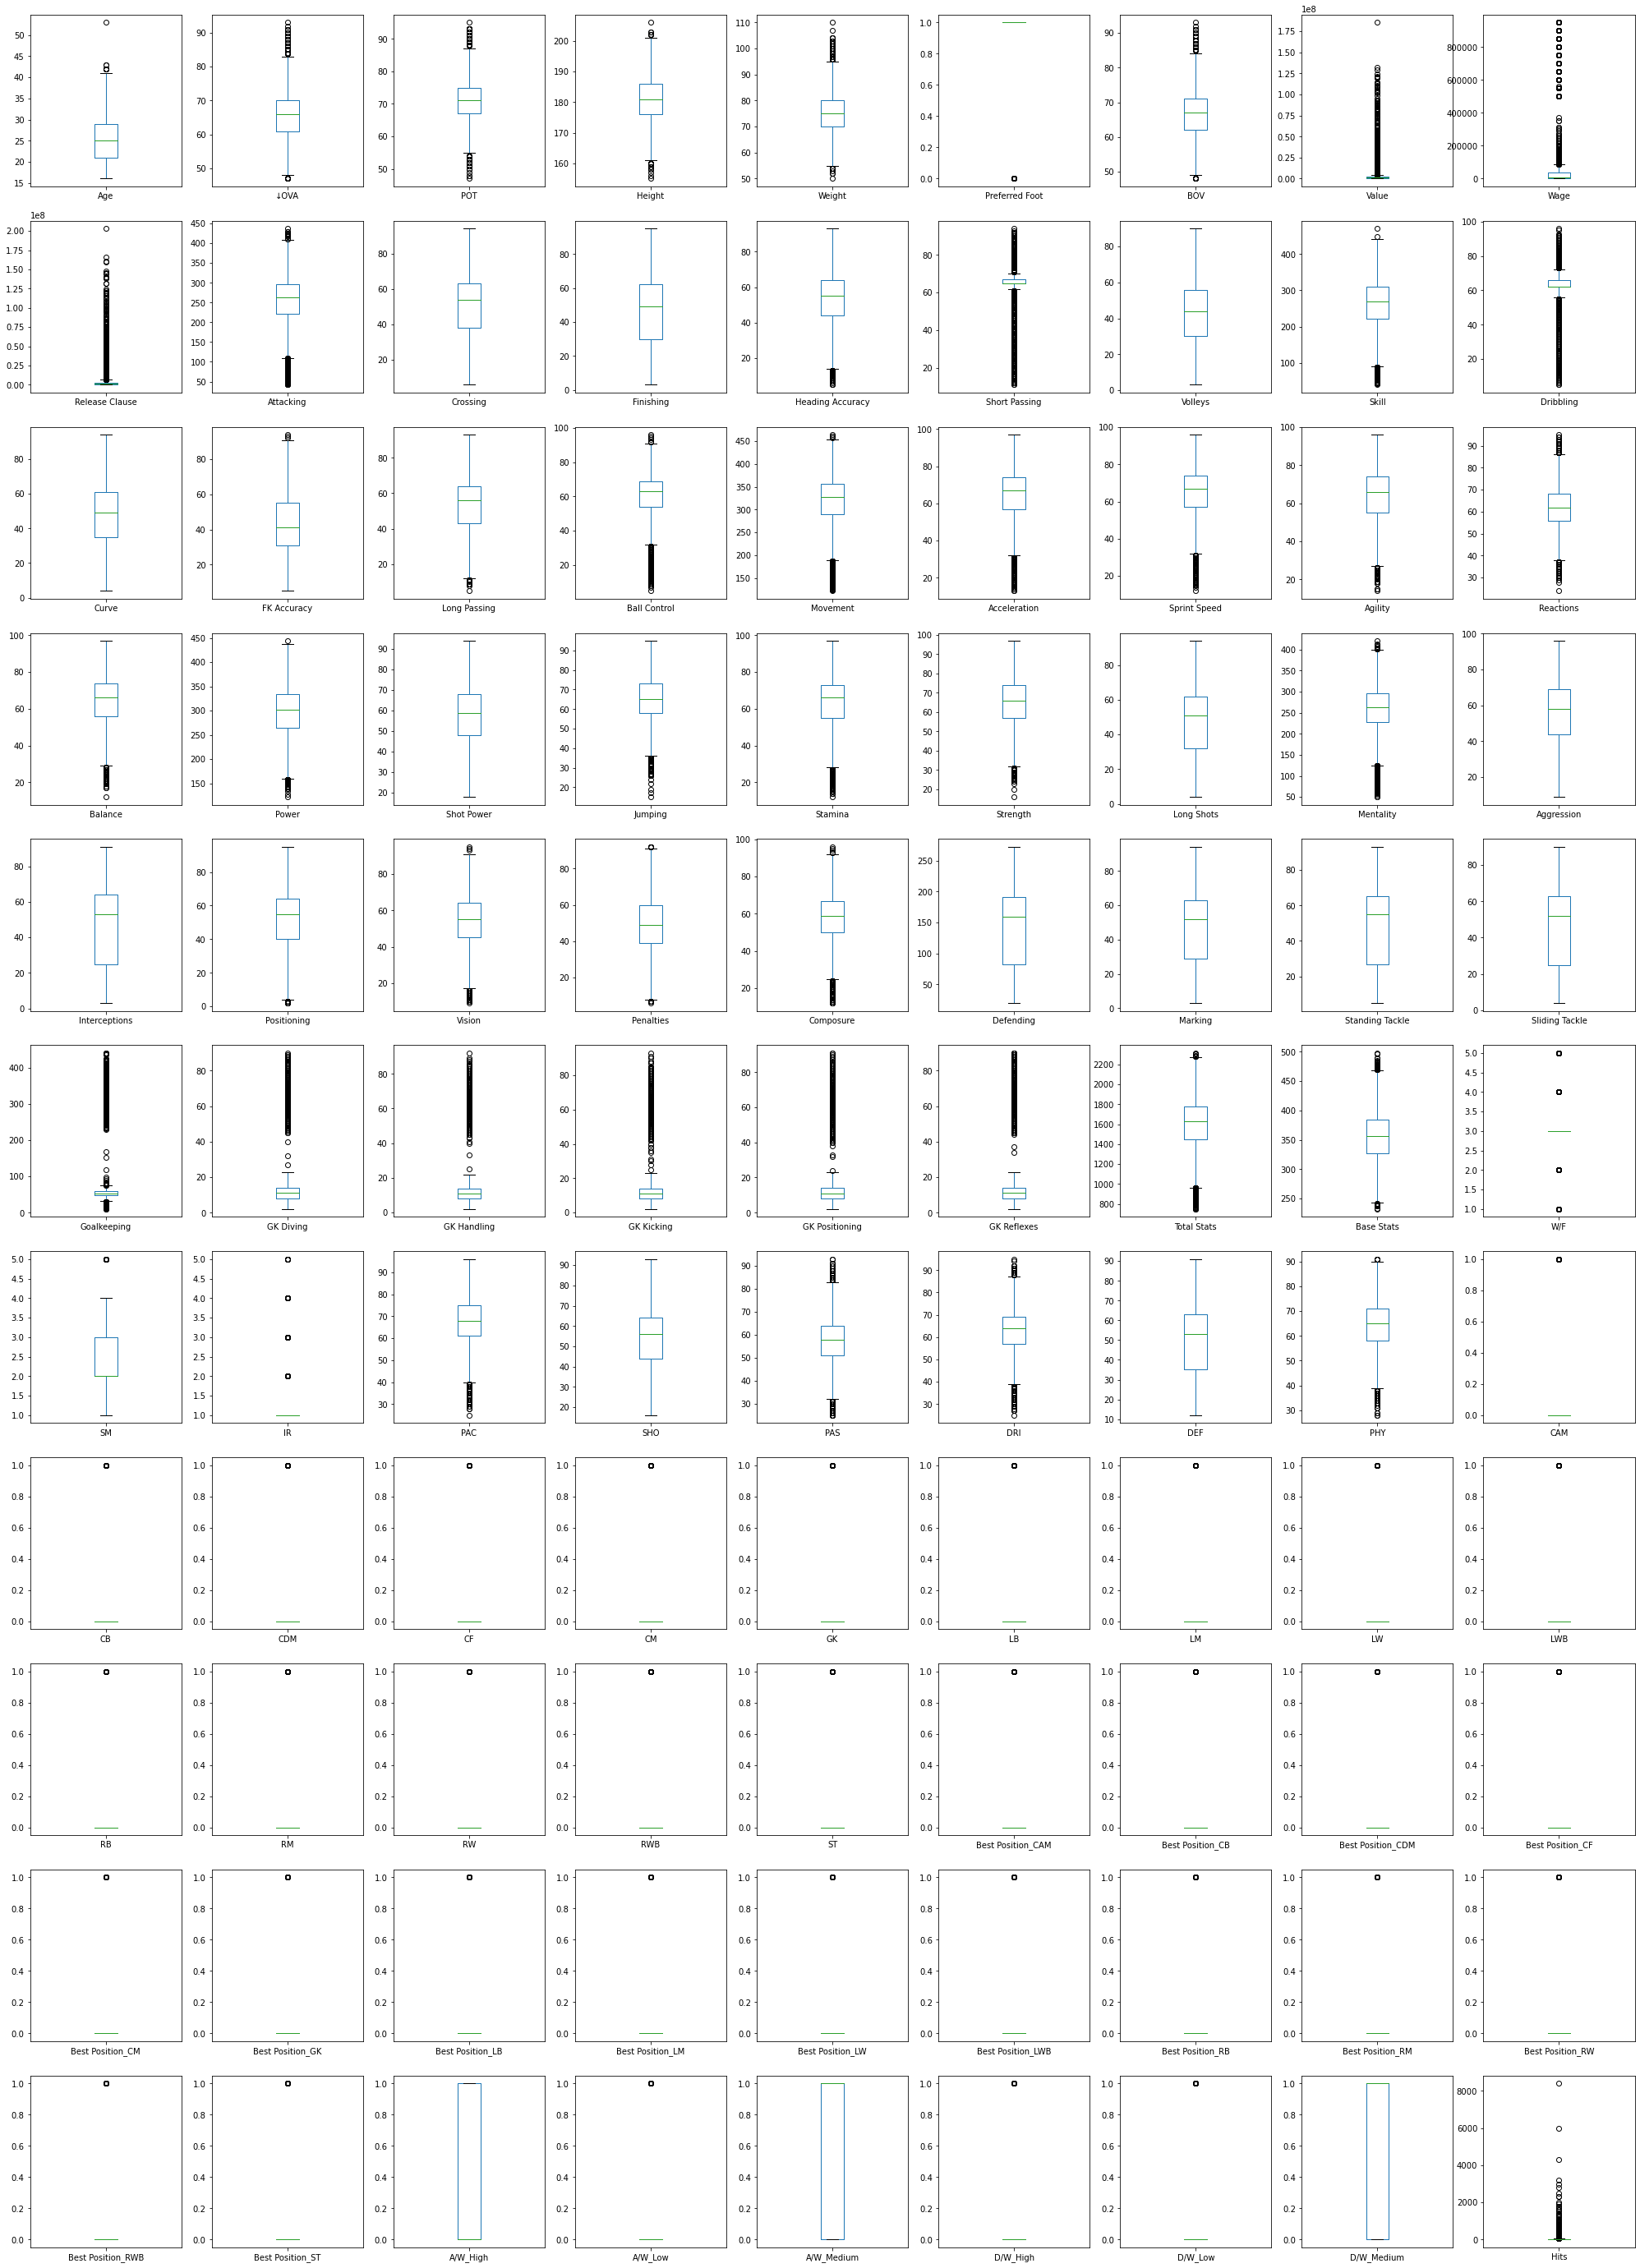

In [456]:
# Box and Whisker Plots
from matplotlib import pyplot


dfnew.plot(kind='box', subplots=True, layout=(11,9), sharex=False, sharey=False)
plt.gcf().set_size_inches(35,50)
pyplot.show()

In [457]:
'''numeric_columns = dfnew.select_dtypes(include='number').columns

# Plot box plots for each numeric column
for col in numeric_columns:
    plt.figure(figsize=(8, 6))  # Set the size of each individual plot
    sns.boxplot(x=dfnew[col])
    plt.title(f'Box Plot of {col}')
    plt.show()'''

"numeric_columns = dfnew.select_dtypes(include='number').columns\n\n# Plot box plots for each numeric column\nfor col in numeric_columns:\n    plt.figure(figsize=(8, 6))  # Set the size of each individual plot\n    sns.boxplot(x=dfnew[col])\n    plt.title(f'Box Plot of {col}')\n    plt.show()"

Dividing the dataframe

In [458]:
dfnew_str = dfnew.select_dtypes(include='object').copy()

dfnew_numeric = dfnew.select_dtypes(include=['int64', 'float64', 'uint8']).copy()

dfnew_hits = dfnew[['Hits']].copy()

In [459]:
dfnew_numeric.head()

,Age,↓OVA,POT,Preferred Foot,BOV,Value,Wage,Release Clause,Attacking,Crossing,...,Best Position_RW,Best Position_RWB,Best Position_ST,A/W_High,A/W_Low,A/W_Medium,D/W_High,D/W_Low,D/W_Medium,Hits
0,33,93.0,93.0,0,93,103500000.0,560000.0,138400000.0,429.0,85.0,...,1,0,0,0,0,1,0,1,0,771.0
1,35,92.0,92.0,1,92,63000000.0,220000.0,75900000.0,437.0,84.0,...,0,0,1,1,0,0,0,1,0,562.0
2,27,91.0,93.0,1,91,120000000.0,125000.0,159400000.0,95.0,13.0,...,0,0,0,0,0,1,0,0,1,150.0
3,29,91.0,91.0,1,91,129000000.0,370000.0,161000000.0,407.0,94.0,...,0,0,0,1,0,0,1,0,0,207.0
4,28,91.0,91.0,1,91,132000000.0,270000.0,166500000.0,408.0,85.0,...,0,0,0,1,0,0,0,0,1,595.0


(array([  262,  1082,  2717,  2773,  3942,  3963,  4924,  5791,  6346,
        7735,  7916,  8170, 10100, 10263, 10833, 11215, 11425, 12457,
       13688, 13900, 14620, 14778, 15082, 15995, 16108, 16620, 17072],
      dtype=int64),)


C:\Users\BONAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

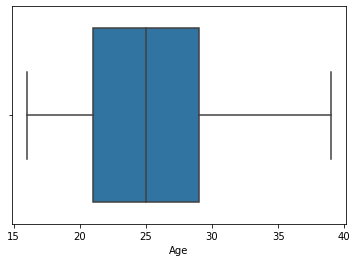

In [470]:
dfnew_numeric1 = dfnew_numeric.copy()
# Z score
from scipy import stats
import numpy as np
 
z = np.abs(stats.zscore(dfnew_numeric1['Age']))

threshold = 3
 

print(np.where(z > threshold))
dfx = dfnew_numeric1.drop(dfnew_numeric1.index[np.where(z > threshold)])
sns.boxplot(dfx['Age'])

In [461]:
z_scores = np.abs(stats.zscore(dfnew_numeric1))

threshold = 3

outlier_indices = np.where(z_scores > threshold)

outlier_indices_flat = np.unique(outlier_indices[0])


dfx = dfnew_numeric1.drop(dfnew_numeric1.index[outlier_indices_flat])



C:\Users\BONAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

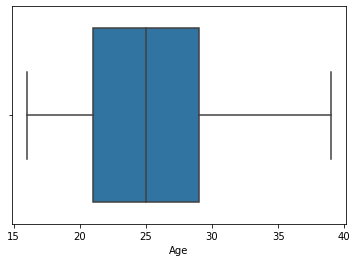

In [471]:
sns.boxplot(dfx['Age'])

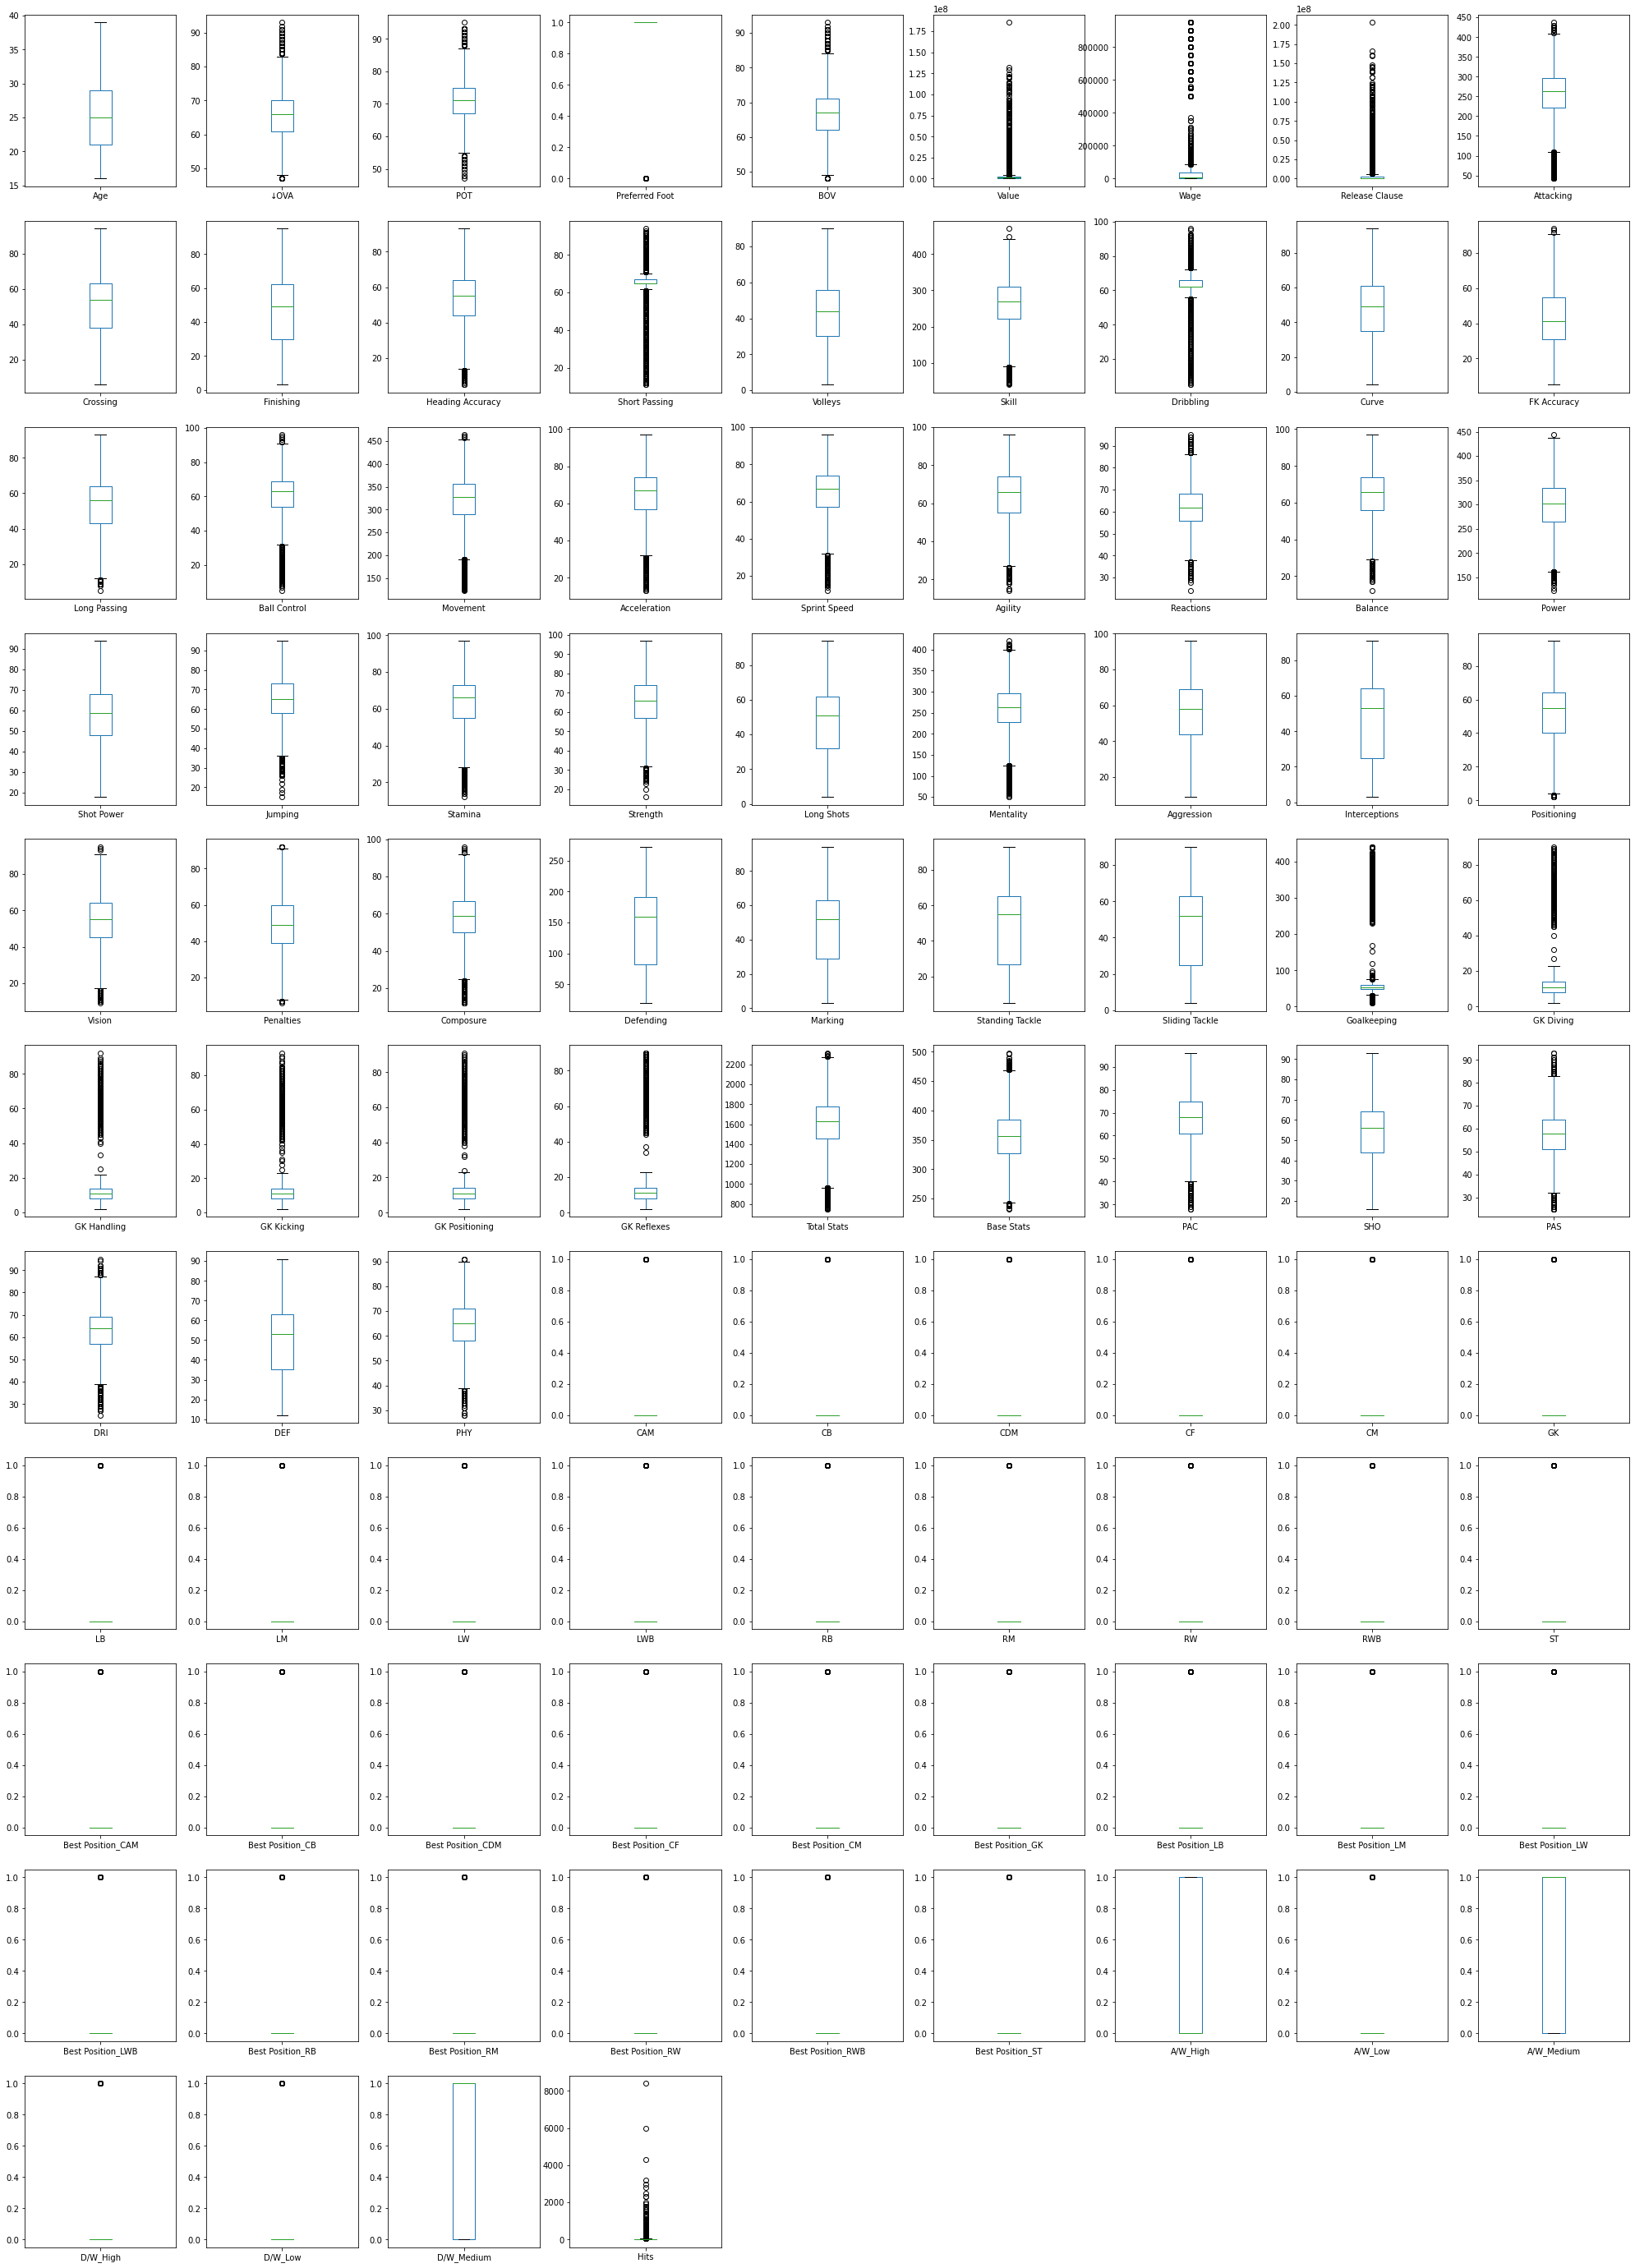

In [472]:
# Box and Whisker Plots
from matplotlib import pyplot


dfx.plot(kind='box', subplots=True, layout=(11,9), sharex=False, sharey=False)
plt.gcf().set_size_inches(35,50)
pyplot.show()

2. Preprocess the cleaned data from task 1 above and transform it into a well behaved data.

In [464]:
dfx.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6384.0,24.578947,4.597750,16.0,21.0,24.0,28.000000,39.0
↓OVA,6384.0,64.372024,6.492496,47.0,60.0,64.0,69.000000,85.0
POT,6384.0,70.672149,5.758670,54.0,67.0,70.0,75.000000,87.0
Preferred Foot,6384.0,0.805608,0.395763,0.0,1.0,1.0,1.000000,1.0
BOV,6384.0,65.735746,6.353881,48.0,61.0,65.0,70.000000,85.0
...,...,...,...,...,...,...,...,...
A/W_Medium,6384.0,0.796836,0.402385,0.0,1.0,1.0,1.000000,1.0
D/W_High,6384.0,0.163534,0.369881,0.0,0.0,0.0,0.000000,1.0
D/W_Low,6384.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
D/W_Medium,6384.0,0.836466,0.369881,0.0,1.0,1.0,1.000000,1.0


Observation: it needs rescalling, standardization and normalization.
But normalizing the dataset solves for all.

In [465]:
dfx1 = dfx.copy()

from sklearn.preprocessing import Normalizer


normalizer = Normalizer(norm='l2')


dfx1_normalized = pd.DataFrame(normalizer.transform(dfx1), columns=dfx1.columns)
dfx1_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6384.0,0.000196,0.001690,5.678691e-07,8.648279e-06,1.904876e-05,0.000032,0.026459
↓OVA,6384.0,0.000461,0.003893,1.922966e-06,2.445008e-05,5.145637e-05,0.000083,0.054404
POT,6384.0,0.000478,0.003996,2.020328e-06,2.687380e-05,5.662318e-05,0.000096,0.060125
Preferred Foot,6384.0,0.000005,0.000052,0.000000e+00,8.375176e-08,6.097103e-07,0.000001,0.000925
BOV,6384.0,0.000466,0.003933,1.971648e-06,2.503696e-05,5.247786e-05,0.000085,0.054404
...,...,...,...,...,...,...,...,...
A/W_Medium,6384.0,0.000005,0.000052,0.000000e+00,8.794146e-08,6.607265e-07,0.000001,0.000925
D/W_High,6384.0,0.000002,0.000028,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000633
D/W_Low,6384.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
D/W_Medium,6384.0,0.000005,0.000051,0.000000e+00,1.479245e-07,6.800180e-07,0.000001,0.000925


In [466]:
dfx1_normalized

,Age,↓OVA,POT,Preferred Foot,BOV,Value,Wage,Release Clause,Attacking,Crossing,...,Best Position_RW,Best Position_RWB,Best Position_ST,A/W_High,A/W_Low,A/W_Medium,D/W_High,D/W_Low,D/W_Medium,Hits
0,1.332554e-06,0.000003,0.000003,3.807296e-08,0.000003,0.552058,0.003617,0.833798,0.000012,2.284378e-06,...,0.0,0.0,0.000000e+00,0.0,0.0,3.807296e-08,3.807296e-08,0.0,0.000000e+00,0.000005
1,1.123181e-06,0.000003,0.000003,3.303474e-08,0.000003,0.578108,0.001850,0.815958,0.000010,1.717807e-06,...,0.0,0.0,0.000000e+00,0.0,0.0,3.303474e-08,3.303474e-08,0.0,0.000000e+00,0.000002
2,1.686337e-06,0.000004,0.000004,4.818104e-08,0.000004,0.529991,0.005300,0.847986,0.000018,3.276311e-06,...,0.0,0.0,0.000000e+00,0.0,0.0,4.818104e-08,4.818104e-08,0.0,0.000000e+00,0.000006
3,8.735655e-07,0.000002,0.000002,0.000000e+00,0.000002,0.641525,0.002047,0.767100,0.000007,6.824730e-07,...,0.0,0.0,0.000000e+00,0.0,0.0,2.729892e-08,2.729892e-08,0.0,0.000000e+00,0.000002
4,1.019220e-06,0.000002,0.000002,2.997707e-08,0.000002,0.524599,0.001169,0.851349,0.000012,1.888555e-06,...,0.0,0.0,2.997707e-08,0.0,0.0,2.997707e-08,0.000000e+00,0.0,2.997707e-08,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6379,3.105172e-05,0.000088,0.000126,1.826572e-06,0.000093,0.273986,0.913286,0.301384,0.000356,5.845030e-05,...,0.0,0.0,0.000000e+00,0.0,0.0,1.826572e-06,0.000000e+00,0.0,1.826572e-06,0.000049
6380,4.101148e-05,0.000094,0.000115,0.000000e+00,0.000094,0.175763,0.976464,0.124987,0.000125,2.734099e-05,...,0.0,0.0,0.000000e+00,0.0,0.0,1.952928e-06,0.000000e+00,0.0,1.952928e-06,0.000052
6381,3.134595e-05,0.000087,0.000124,1.843879e-06,0.000094,0.239704,0.921940,0.304240,0.000372,4.978475e-05,...,0.0,0.0,0.000000e+00,0.0,0.0,1.843879e-06,0.000000e+00,0.0,1.843879e-06,0.000049
6382,3.134594e-05,0.000087,0.000124,1.843879e-06,0.000094,0.239704,0.921939,0.304240,0.000389,7.006740e-05,...,0.0,0.0,0.000000e+00,0.0,0.0,1.843879e-06,0.000000e+00,0.0,1.843879e-06,0.000049


3. Select input features for an outcome feature of HITS.

using RFE

In [467]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = dfx1_normalized.drop('Hits', axis=1)  # Input features
y = dfx1_normalized['Hits']  # Target variable

estimator = LinearRegression()

n_features_to_select = 47

rfe = RFE(estimator, n_features_to_select)

rfe.fit(X, y)

selected_features = X.columns[rfe.support_]

feature_ranking = rfe.ranking_

print("Selected Features:")
print(selected_features)

print("\nFeature Ranking:")
print(pd.DataFrame({'Feature': X.columns, 'Ranking': feature_ranking}).sort_values(by='Ranking'))


C:\Users\BONAT\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=47 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Selected Features:
Index(['Age', '↓OVA', 'Preferred Foot', 'BOV', 'Crossing', 'Heading Accuracy',
       'Acceleration', 'Sprint Speed', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Standing Tackle', 'Goalkeeping',
       'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'PAC',
       'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'CAM', 'CB', 'CDM', 'CM', 'GK', 'LM',
       'RB', 'RM', 'ST', 'Best Position_CAM', 'Best Position_CB',
       'Best Position_GK', 'Best Position_ST', 'A/W_High', 'A/W_Medium',
       'D/W_High', 'D/W_Medium'],
      dtype='object')

Feature Ranking:
              Feature  Ranking
0                 Age        1
36             Vision        1
37          Penalties        1
41    Standing Tackle        1
43        Goalkeeping        1
..                ...      ...
81  Best Position_LWB       43
79   Best Position_LM       44
80   Best Position_LW       45
69    

In [468]:
feature_ranking

array([ 1,  1, 17,  1,  1, 27, 29, 28, 16,  1,  2,  1, 13, 10,  6, 26,  8,
        9,  3, 18, 19,  1,  1, 12, 14,  5, 20, 15,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, 25,  4, 21,  1, 22,  1, 23, 24,  7,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, 30,  1,  1, 11,  1, 32, 31,  1,
        1, 46, 33,  1,  1,  1, 38, 47, 34,  1, 42, 44, 45, 43, 35, 36, 37,
       39,  1,  1, 40,  1,  1, 41,  1])

Okonofua Odion Joel

Cohort 16 Data Analytics